<img 
  class="-inro-notebook-icon-inro-small" 
  style="margin-left: 0; margin-bottom: 15px;">
  © Copyright 2018, INRO.
</img>

Please note that this notebook should be run on a fresh copy of the Winnipeg demonstration project; otherwise you may encounter an error.

In [ ]:
%modeller --show_output false

#Desktop API Guide
This notebook provides some examples of the use of the Desktop API. The Desktop API enables automation of the Emme Desktop application. You can write scripts which use the Desktop API to open databases and scenarios, customize and display worksheets, print or save views to file, just as you would if you were operating the Emme Desktop with a mouse and keyboard.

##Contents

<a href="#Accessing-the-Emme-Desktop">Accessing the Emme Desktop</a>

<a href="#Working-with-Worksheets">Working with Worksheets</a>
- <a href="#Accessing-and-opening-worksheets">Accessing and opening worksheets</a>
- <a href="#Setting-the-view-of-a-worksheet">Setting the view of a worksheet</a>
- <a href="#Printing-and-exporting-worksheets">Printing and exporting worksheets</a>
- <a href="#Modifying-a-worksheet">Modifying a worksheet</a>
- <a href="#Saving-a-worksheet">Saving a worksheet</a>

<a href="#Working-with-Data-Explorer">Working with Data Explorer</a>
- <a href="#Accessing-scenarios">Accessing scenarios</a>
- <a href="#Changing-the-active-database">Changing the active database</a>

<a href="#Working-with-Tables">Working with Tables</a>
- <a href="#Opening-and-closing-tables">Opening and closing tables</a>
- <a href="#Modifying-a-network-table">Modifying a network table</a>
- <a href="#Modifying-a-matrix-table">Modifying a matrix table</a>
- <a href="#Printing-and-exporting-data-from-tables">Printing and exporting data from tables</a>
- <a href="#Saving-tables">Saving tables</a>

<a href="#Working-with-Configurable-Attributes">Working with Configurable Attributes</a>

<a href="#Conclusion">Conclusion</a>

##Accessing the Emme Desktop
The entry point for the Desktop API is the <code><b>inro.emme.desktop.app</b></code> module, which represents an application of the Emme Desktop software.

When scripting outside of the Emme Notebook, there are two ways to create an <code>App</code> object: by connecting to an already running application of the Emme desktop software or by starting a new instance of Emme and then connecting to it.

In an Emme Notebook, the connection is done automatically. Let's create our <code>App</code> object.

In [ ]:
desktop = inro.modeller.Modeller().desktop

From this object, we can now access the project properties, the explorers, the worksheets and tables, etc.

##Working with Worksheets
Many common uses of the Desktop API involve customizing and/or printing worksheets. The relevant classes are those available in the <code><b>worksheet</b></code> module, such as: <code><b>WorksheetFolder</b></code>, <code><b>WorksheetItem</b></code> and <code><b>Worksheet</b></code>.

###Accessing and opening worksheets
It is easy to access the currently active worksheet in Emme. For example, the following code snippet will print the name of the current window (worksheet or table).

In [ ]:
my_worksheet = desktop.current_window()
print my_worksheet.par("Name").get()

Winnipeg General Worksheet


In the same way, it is possible to print the name of all worksheets and tables currently opened using the <code><b>windows()</b></code> method.

In [ ]:
for worksheet in desktop.windows():
    print worksheet.par("Name").get()

Winnipeg General Worksheet


In order to open a specific worksheet, we need to find it in its hierarchy of folders. The easiest way to do this is to use the <code>ExplorerFolder<b>.find_item()</b></code> method, or the <code>ExplorerFolder<b>.find_items()</b></code> method (to return multiple worksheets in the same path). First, let's get the <code>root_worksheet_folder</code>.

In [ ]:
root_worksheet_folder = desktop.root_worksheet_folder()

The <code>root_worksheet_folder</code> is an instance of <code><b>ExplorerFolder</b></code>, and we can use it to search through the entire tree of worksheet folders to find any worksheet or table we are interested in. 
The worksheet's path is specified by creating a list of the folder names that contain the worksheet: ["<i>folder name</i>", "<i>folder name</i>", ..., "<i>worksheet name</i>"]. For instance:

In [ ]:
worksheet_path = ["General", "Network", "Base network"]
worksheet_item = root_worksheet_folder.find_item(worksheet_path)

We specified the path to the <i>Base network</i> worksheet, and we looked up a reference to the worksheet - a <code><b>WorksheetItem</b></code> from the <code>root_worksheet_folder</code>. We haven't yet opened the worksheet. We can use <code><b>find_items()</b></code> in the same way, but note that it will always return a list of items, even if only one item is found:

In [ ]:
worksheet_path = ["General", "Network", "Scenario comparison", "Compare links"]
worksheet_item_list = root_worksheet_folder.find_items(worksheet_path)
for item in worksheet_item_list :
    print item.name(), item.type_name()

Compare links Worksheet
Compare links NetworkTable


Notice that this snippet finds two worksheet items with the name <i>Compare links</i> at this path; one is a Worksheet, and the other is a Network Table. It is important to be aware that worksheet names are not guaranteed to be unique in the Explorer, not even at the same path. We can limit the type of <code>WorksheetItem</code> by specifying the optional type argument to the <code><b>find_items()</b></code> method. The type can be one of three possibilities: <code>"Worksheet"</code>, <code>"NetworkTable"</code> or <code>"MatrixTable"</code>. For example:

In [ ]:
worksheet_item_list = root_worksheet_folder.find_items(worksheet_path, type="NetworkTable")
for item in worksheet_item_list :
    print item.name(), item.type_name()

Compare links NetworkTable


There are alternative ways to find worksheets and tables. We could traverse the hierarchy of the project's worksheet folders and worksheet items as seen in the Explorer window. The methods <code>ExplorerFolder<b>.child_items()</b></code> and <code>ExplorerFolder<b>.child_folders()</b></code> allows searching through the Worksheets and Tables similar to browsing through folders manually in the Explorer window. For instance, the following code snippet finds the child folders of the root of the worksheet folder and then prints their names.

In [ ]:
root_worksheet_folder = desktop.root_worksheet_folder()
root_child_folders = root_worksheet_folder.child_folders()
for folder in root_child_folders:
    print folder.name()

General
Winnipeg


What if we need to find a worksheet with a specific name, but we do not know where in the hierarchy it lived? We can run a search for this by name using the <code>ExplorerFolder<b>.all_subfolders()</b></code> method, as follows:

In [ ]:
root_worksheet_folder = desktop.root_worksheet_folder()
worksheet_name = "Base network by volume-delay function"
for folder in root_worksheet_folder.all_subfolders():
    print "... searching in folder", folder.name()
    for item in folder.child_items():
        if item.name() == worksheet_name:
            print "    Worksheet found!", item.name()

... searching in folder General
... searching in folder Charts
... searching in folder Functions
... searching in folder Histograms
... searching in folder XY-charts
... searching in folder Matrices
... searching in folder Network
... searching in folder Road
    Worksheet found! Base network by volume-delay function
... searching in folder Scenario comparison
... searching in folder Transit
... searching in folder Results Analysis
... searching in folder Scenario comparison
... searching in folder Traffic
... searching in folder Summaries
... searching in folder Transit
... searching in folder Summaries
... searching in folder Winnipeg
... searching in folder Traffic
... searching in folder Transit
... searching in folder Workshop
... searching in folder Zones and Matrices


So far we have stopped short of actually opening a new worksheet in the Emme Desktop software. In order to work with the actual Worksheet, we must first open it. After finding a <code>WorksheetItem</code> we can call the <code>WorksheetItem<b>.open()</b></code> method to open the worksheet.

In [ ]:
root_worksheet_folder = desktop.root_worksheet_folder()
ws_path = ["General", "Network", "Road", "Base network with node boxes"]
base_network_nodeboxes_i = root_worksheet_folder.find_item(ws_path)
base_network_nodeboxes_ws = base_network_nodeboxes_i.open()

After running the above snippet, the <i>Base network with node boxes</i> worksheet will be open in the Emme Desktop software.

We can also open a specific worksheet by its file path, using the <code>App<b>.open_worksheet()</b></code> method, as follows:

In [ ]:
import os

project_directory = os.path.dirname(desktop.project_file_name())
ws_file = os.path.join(project_directory, "Worksheets", "Winnipeg",
                       "Traffic", "Bridge_usage.emw")
bridge_usage_ws = desktop.open_worksheet(ws_file)

When using the Emme Notebook, it is also possible to drag a worksheet directly from the Desktop into a Notebook cell. This will create a new instance of the worksheet in the Desktop. The default name of the new worksheet object is <code>worksheet</code><i>n</i>. In the following cell, the Winnipeg General Worksheet has been dragged and the name has been changed from <code>worksheet0</code> to <code>winnipeg_general_ws</code>. Re-run the cell below in order to instantiate the worksheet in the Notebook environment:

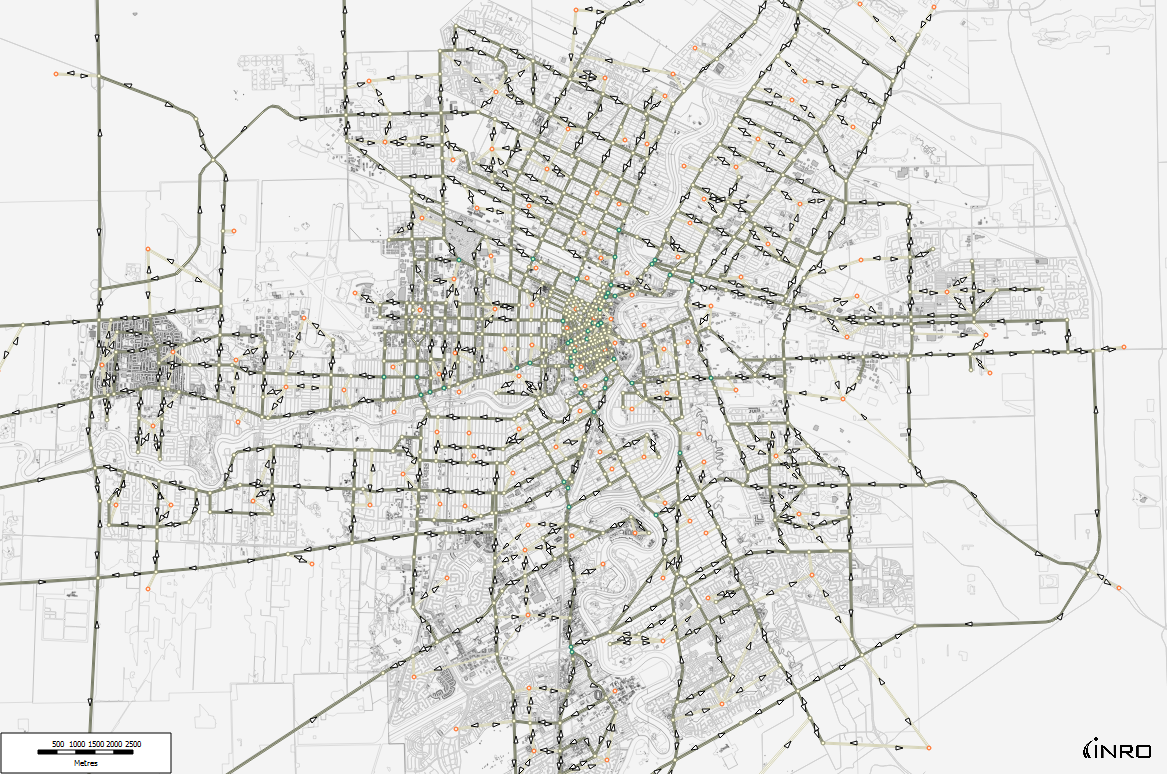

In [ ]:
%%modeller_worksheet "[Desktop-API-Guide-v2-1458569302377]-Winnipeg_general.emw" --view "[623632.201581, 5516843.96245, 642815.798419, 5537146.03755]" --out winnipeg_general_ws --proxy PROXY-258622296-1481729103.12 --size "[682.5, 511.875]"
D2461A6A-1F51-4A2C-87AC-6C3C49AA9DF7 07B0F5AD-A2A7-4B4E-B4A9-06EB441586D6 2 4 0
# Emme worksheet generated on Mon Mar 21 10:08:22 2016
# File: C:/Emme/Projects/Winnipeg/Scripts/.modeller/[Desktop-API-Guide-v2-1458569302377]-Winnipeg_general.emw
#
# String Name: name of worksheet (tr,subst)
Name : PlotName
Name = Winnipeg General Worksheet
# Text Description: description of worksheet (tr,subst)
Description = <h2 style="clear: both">Winnipeg General Worksheet</h2>\
<p>This worksheet can be used to display attributes for several\
types of network element. Each tab corresponds to one type of\
network element. For each layer, one or several filters allow\
restricting the elements analyzed.</p>\
This worksheet is a modified version of the <i>General worksheet</i>\
common to all projects. \
It contains the following additional layers:\
<ul>\
<li><b><font color= "navy">Buildings</font></b>:\
<i>GIS vector</i> layer showing buildings from winnipeg land use data table.</li>\
<li><b><font color= "navy">Roads</font></b>:\
<i>GIS vector</i> layer showing all the Winnipeg roads.</li>\
<li><b><font color= "navy">Street names</font></b>:\
<i>Link text</i> layer to display street names contained in wpglinks data table.</li>\
<li><b><font color= "navy">Distance legend</font></b>:\
<i>Legend</i> layer to display a distance item in the lower left corner of the map.</li>\
</ul>\
</p>\
<h4>Desire lines</h4>\
To display desire lines from/to selected zone(s):\
<ul>\
<li>Enter the matrix identifier or name in the <b><font color=\
"navy">Matrix value</font></b> field.</li>\
<li>Select the pointer tool and double-click on the desired zone\
(it may help to change the filter in the <b><font color=\
"navy">Nodes</font></b> layer to <tt><b>isZone</b></tt> in order to\
restrict the nodes that can be picked with the pointer tool). Use\
Ctrl+double-click to add nodes to the list. Selected zones are\
displayed with the <b><font color="navy">Marked node(s)</font></b>\
style.</li>\
<li>Use one of the predefined choices in <b><font color=\
"navy">Direction</font></b> to draw arrows <b>from</b> or\
<b>to</b> the selected zone(s).</li>\
<li>The arrow width is adjusted automatically when changing the\
matrix value. Use <b><font color="navy">Scale</font></b> to\
increase/reduce the arrow width.</li>\
<li>Arrows are colored using the <b><font color=\
"navy">Arrows</font></b> style and the <b><font color=\
"navy">Index</font></b> expression.</li>\
<li>Use <b><font color="navy">Intrazonals</font></b> to display the\
intrazonal values as circles over the corresponding selected\
zones.</li>\
<li>Use <b><font color="navy">Numeric value</font></b> to display\
the matrix value numerically. A value is displayed only if the\
arrow is wide enough to accommodate the text size specified.</li>\
</ul>\
<h4>Nodes</h4>\
This layer can be used to display node circles,\
node boxes with or without node box text,\
and node attributes in the form of symbols.\
<p><em>Node boxes</em></p>\
<ul>\
<li>Select <b><font color="navy">Node box</font></b> to display a\
small square at node location. Node boxes are colored using the\
<b><font color="navy">Node style</font></b>: index 0 for\
regular nodes, index 1 for centroids and index 2 for\
intersections.</li>\
<li>To restrict the number of nodes displayed, use <b><font color=\
"navy">Node filter</font></b>.</li>\
<li>To display values in the node boxes, enter up to 6 numeric or\
text node values (separated by commas) in the <b><font color=\
"navy">Node box text</font></b> field. For example, use\
<tt><b>id</b></tt> to display the node identifier. The size of the\
box is adjusted automatically.</li>\
<li>Specify the text size and the desired number of decimals.</li>\
<li>By default, node boxes are centered on the node coordinates. To\
move the node boxes to the right/left use <b><font color=\
"navy">H.offset</font></b>; to move up/down, use <b><font color=\
"navy">V.offset</font></b>.</li>\
</ul>\
<p><em>Node symbols</em></p>\
<ul>\
<li>To display node values in the form of symbols at nodes, enter\
up to 12 numeric node values (separated by commas) in the\
<b><font color="navy">Symbol value</font></b> field, or choose one\
of the predefined expressions at the top of the popup list.</li>\
<li>The initial symbol is <em>Circle</em> allowing the display of\
several attributes as a pie chart. Use <b><font color=\
"navy">Symbol</font></b> to choose another symbol.</li>\
<li>The scale is adjusted automatically when changing the symbol\
value expression. Use <b><font color="navy">Scale</font></b> to\
reduce/increase the size of the symbol.</li>\
<li>By default, the scale factor is applied to the diameter of the symbol.\
To apply the scale factor to the area, select <b><font color="navy">Prop.to area</font></b>.</li>\
<li>Symbols are colored using the <b><font color="navy">Symbol style</font></b>\
and the <b><font color="navy">Symbol index</font></b> expression.\
When displaying more than one value, use the empty expression\
so that each value is displayed with a different style index.</li>\
</ul>\
<h4>Sum of segment values</h4>\
This layer can be used to display transit values summed over links\
and/or nodes.\
<ul>\
<li>Turn on the layer visibility icon. By default, the bars are\
proportional to the number of transit lines using each link.</li>\
<li>To restrict the number of lines displayed, use <b><font color=\
"navy">Line filter</font></b>. The initial filter is <em>all\
lines</em>.</li>\
</ul>\
<p><em>Bars on links</em></p>\
<ul>\
<li>To define the part of the network that is of interest, use\
<b><font color="navy">Link filter</font></b>. Only the part of the\
filtered lines that run on the specified sub-network will be\
used.</li>\
<li>To display segment values in the form of bars, enter up to 12\
numeric segment values (separated by commas) in the <b><font color=\
"navy">Seg. value on links</font></b> field or choose one of the\
predefined expressions at the top of the popup list. The value will\
be summed for all lines filtered over all links filtered.</li>\
</ul>\
<p><em>Symbols at nodes</em></p>\
<ul>\
<li>To restrict the number of nodes displayed, use <b><font color=\
"navy">Node filter</font></b>.</li>\
<li>To display segment values in the form of symbols at nodes,\
enter up to 12 numeric segment values (separated by commas) in the\
<b><font color="navy">Seg. value at nodes</font></b> field or\
choose one of the predefined expressions at the top of the popup\
list. The value will be summed for all lines filtered over all\
nodes filtered.</li>\
<li>The initial symbol is <em>Circle</em> allowing the display of\
several attributes as a pie chart. Use <b><font color=\
"navy">Symbol</font></b> to choose another symbol.</li>\
</ul>\
<p><em>Text values</em></p>\
<ul>\
<li>To display the numeric values inside the bars, select\
<b><font color="navy">Show bar numeric values</font></b>.</li>\
<li>To display the numeric values over the symbols, select\
<b><font color="navy">Show symbol numeric values</font></b>.</li>\
<li>Specify the text size and the desired number of decimals.</li>\
</ul>\
<h4>Transit lines</h4>\
<ul>\
<li>Turn on the layer visibility icon. Initially all lines are\
shown with a segment offset of 1.</li>\
<li>To restrict the number of lines displayed, use <b><font color=\
"navy">Line filter</font></b>.</li>\
<li>To define the part of the network that is of interest, use\
<b><font color="navy">Link filter</font></b>. The initial filter is\
the empty expression, that is, <em>all links</em>. Only the part of\
the filtered lines that run on the specified sub-network will be\
drawn.</li>\
<li>Lines are displayed using the pen properties of the\
<b><font color="navy">Lines</font></b> style and <b><font color=\
"navy">Line index</font></b> expression. The initial index\
expression is set to <tt><b>lindex%10</b></tt>, which displays the\
lines with a rotation of 10 colors. To change the pen width, click\
the style tool and select <b><font color="navy">All indices -&gt;\
Pen width</font></b></li>\
<li>Use <b><font color="navy">Link offset</font></b> to change the\
number of pixels between the link base and the first transit\
segment.</li>\
<li>Use <b><font color="navy">Seg. offset</font></b> to change the\
number of pixels between line segments.</li>\
</ul>\
<p><em>Stops</em></p>\
<ul>\
<li>Use <b><font color="navy">Line ends</font></b> to identify the\
first and last stops with two special symbols.</li>\
<li>Use <b><font color="navy">Transit stops</font></b> to identify\
all the stops (boarding and/or alighting allowed) along the\
itinerary.</li>\
<li>Use <b><font color="navy">Stop size</font></b> to adjust the\
size of the transit stops and line ends symbols.</li>\
</ul>\
<p><em>Line names and segment values</em></p>\
<ul>\
<li>Choose <b><font color="navy">Line names</font></b> to display\
the line name on each segment. Line name is displayed if there is\
enough space on the link.</li>\
<li>Use <b><font color="navy">Segment value</font></b> to display\
up to 2 transit segment values. The first value is displayed on the segment,\
the second value is displayed on the I-node of the segment.\
<li>Use <b><font color="navy">Text size</font></b> to control the\
size and <b><font color="navy">Text offset</font></b> to control\
the position of the text. An offset of 0 centers the text on the\
line, while positive and negative values display it on opposite\
sides of the line.</li>\
</ul>\
<h4>Turns at intersections</h4>\
By default, the turn value expression follows the link predefined\
expression selected in the <b><font color="navy">Links</font></b>\
layer.\
<ul>\
<li>To restrict the number of intersection nodes displayed, use\
<b><font color="navy">Intersection filter</font></b>. The initial\
filter is <em>intersection nodes connected to filtered\
links</em>.</li>\
<li>To prevent the display of turn values when using one of the\
link predefined expressions, use <em>no nodes</em> as filter\
expression or turn off the layer visibility icon.</li>\
<li>To overwrite temporarily the default behavior, enter a new\
expression in the <b><font color="navy">Turn value</font></b> field\
(default behavior is reset when another predefined expression is\
selected in the <b><font color="navy">Links</font></b> layer).</li>\
<li>Use <b><font color="navy">Scale</font></b> to increase/reduce\
the turn bars width. Scale for link value(s), if any, will follow\
automatically.</li>\
<li>Bars are colored using the <b><font color=\
"navy">Turns</font></b> style and the <b><font color="navy">Turn\
index</font></b> expression. By default, all bars are colored using\
index 0. Predefined expressions at the top of the index popup list\
allow coloring bars according to turn penalty function and turn\
angles.</li>\
<li>To display the turn numeric value inside the bars, select\
<b><font color="navy">Value at beginning of turn</font></b> and/or\
<b><font color="navy">Value at end of turn</font></b>. If the\
linear part of the turns is 0, numeric values are displayed outside\
the intersection circle. If the linear part is greater than 0,\
numeric values are displayed inside the linear part, if large\
enough (the linear part is expressed in percentage).</li>\
<li>Specify the desired number of decimals in the <b><font color=\
"navy">Decimals</font></b> field.</li>\
<li>By default, intersection circles are shown and sized\
automatically to avoid overlap with neighboring nodes. Use\
the <b><font color="navy">Diameter</font></b> field to change the\
maximum size (in pixels) of the intersection circles.</li>\
<li>To draw an arrow at the beginning and the end of each turn,\
use <b><font color="navy">Turn arrows</font></b>.\
The size of the arrows is controlled using <b><font color="navy">Arrow \
width</font></b> and <b><font color="navy">Arrow height</font></b>.</li>\
</ul>\
<h4>Links</h4>\
<ul>\
<li>To restrict the number of links displayed, use <b><font color= "navy">Link filter</font></b>.\
The initial filter is <em>all links</em>.\
The link filter in this layer is the <em>master</em>\
one, that is, other layers can refer to this filter using\
<tt><b>isActive</b></tt>. For example, in a node layer,\
<tt><b>isActive</b></tt> refers to the nodes connected to the\
filtered links.</li>\
</ul>\
<p><em>Base links</em></p>\
<ul>\
<li>Base links are displayed using <b><font color=\
"navy">Links</font></b> style and the <b><font color="navy">Link\
index</font></b> expression. The initial index expression is set to\
<tt><b>isConnector</b></tt>, which yields 0 for regular links and 1\
for connectors.</li>\
<li>Use <b><font color="navy">Link arrows</font></b>\
to draw an arrow showing the direction of the link.\
The size of the arrow is proportional to the link offset.</li>\
</ul>\
<p><em>Bars on links</em></p>\
<ul>\
<li>To display link values in the form of bars, enter up to 12\
numeric link values (separated by commas) in the <b><font color=\
"navy">Bar value</font></b> field.</li>\
<li>The first value in a multivalue expression corresponds to the\
innermost layer, the last to the outermost.</li>\
<li>Bars are colored using the <b><font color=\
"navy">Bars</font></b> style and the <b><font color="navy">Bar\
index</font></b> expression. By default (empty expression), each\
bar is colored according to the value index.</li>\
<li>To display the numeric value inside the bars, select\
<b><font color="navy">Show bar value</font></b>. Specify the\
desired number of decimals in the <b><font color=\
"navy">Decimals</font></b> field.</li>\
<li>To display auto assignment results, use one of the predefined\
expressions at the top of the <b><font color="navy">Bar\
value</font></b> popup list.</li>\
</ul>\
<p><em>Text on links</em></p>\
<p>To display link values in the form of text, enter up to 12 text\
link values (separated by commas) in the <b><font color="navy">Text\
value</font></b> field. Values are displayed on top of bars. For\
example, use <tt><b>modes</b></tt> to display the string showing\
all the link modes.</p>\
<p>Worksheet file: <code>Winnipeg_general.emw</code></p>\
<hr>\
<small>Copyright &copy; 2015, INRO. All rights reserved.</small>
# String Caption: caption that appears on window bar (tr,subst)
Caption = %<Name>%
# String Active: name of currently active layer
Active : ActiveLayer
Active = Links
# Bool AllowReordering: Layers reordering of this configuration is permitted
AllowReordering = 0
# Float TransformationMatrix: coordinate transformation matrix
TransformationMatrix : (0x200) /TransformationMatrix!/$WorksheetLoaded
TransformationMatrix[] = 0
TransformationMatrix[] = 0
TransformationMatrix[] = 1
TransformationMatrix[] = 1
TransformationMatrix[] = 0
TransformationMatrix[] = 0
TransformationMatrix[] = 0
TransformationMatrix[] = 0

[Background]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Background color
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowBackColor
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowBackColor
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 0
# Style Style: style for filling background when no wallpaper is used
Style : (0x200) /BackgroundColor!/$WorksheetLoaded
Style = 0x00000000 0x01f4f4f4 0x00000000 0x00000000

[Inclusion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Background layer(s)
# Text Description: user definable layer description (tr,subst)
Description = Includes user defined layers (in application mode,\
control shown only if a file is specified and control is substituted)
# Flags Flags: bit pattern containing layer flags
Flags = 0xb800000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowBackInclusion
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowBackInclusion
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Bool EnableObjects: enable included objects
EnableObjects = 1
# Bool SubstituteControl: display control of first visible included layer instead of inclusion layer's control
SubstituteControl = 1
# Bool AutoHideControl: hide unsubstituted layer control
AutoHideControl = 1
# String ConfigurationFile: file containing configuration to include (subst)
ConfigurationFile : (0x200) /UserBack!/$WorksheetLoaded
ConfigurationFile[] = 
ConfigurationFile[] = 
ConfigurationFile[] = %<$ProjectPath>%/Media/roads.eml
ConfigurationFile[] = %<$ProjectPath>%/Media/buildings.eml
ConfigurationFile[] = %<$ProjectPath>%/Media/land_and_waterway.eml

[GIS vector]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Buildings
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 1
# Bool BFlag: include bounding box in full view
BFlag = 0
# String DatasetTextEncoding: encoding used for text in the dataset table(s)
DatasetTextEncoding = UTF-8
# Expression StyleIndex: shape style index (tr,string,3 private attr.)
StyleIndex = BUILDING!=""
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks[] = 0.000000000000000;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks = 1
# String BreakMethod: break compute method
BreakMethod = Sorted
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks = 1
# Style Style: fill / outline properties for shapes
Style[] = 0x20000000 0x01000000 0x03ffffff 0x019995ac
Style[] = 0x20000000 0x01ffffff 0x03000000 0x01ffc5ac
# String VectorFile: file specification for file to display
VectorFile = %<$ProjectPath>%/data_tables.db
# String Dataset: Dataset used from data source for drawing
Dataset = 1 - winnipeg land use

[GIS vector]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Roads
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowRoadShapefile
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowRoadShapefile
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowRoadShapefile
LFlag = 1
# Bool BFlag: include bounding box in full view
BFlag = 0
# Expression StyleIndex: shape style index (tr,string,3 private attr.)
StyleIndex[] = 5
StyleIndex[] = 5
StyleIndex[] = if(TYPE=="Hwy",4,5)
StyleIndex[] = which((TYPE),"Rd","Prom","Blvd","Hwy","Ave","Dr","St")
# Style Style: fill / outline properties for shapes
Style[] = 0x21dcb5b5 0x01dcb5b5 0x00000000 0x00000000
Style[] = 0x2199b3cc 0x0199b3cc 0x00000000 0x00000000
Style[] = 0x21a7cc95 0x01a7cc95 0x00000000 0x00000000
Style[] = 0x21ffe798 0x01ffe798 0x00000000 0x00000000
Style[] = 0x21ff8c57 0x01ff8c57 0x00000000 0x00000000
Style[] = 0x21d1d1d1 0x01d1d1d1 0x00000000 0x00000000
Style[] = 0x21ebe6dc 0x01ebe6dc 0x00000000 0x00000000
# String VectorFile: file specification for file to display
VectorFile = %<$ProjectPath>%/Media/WinnipegRoads.shp
# String DefaultDirectory: default directory for files (subst)
DefaultDirectory = %<$ProjectPath>%/Media
# String Dataset: Dataset used from data source for drawing
Dataset = 1 - WinnipegRoads

[Link value]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = dummy layer
# Text Description: user definable layer description (tr,subst)
Description : (0x800)
Description = Used to position segment link value with incremental offset
# Flags Flags: bit pattern containing layer flags
Flags = 0xbf00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowLinkDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLinkDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 0
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Bool DrawLinkBars: draw link bars with proportional width
DrawLinkBars : DrawLinkBars
DrawLinkBars = 1
# Bool NumericalValues: display link values numerically on links
NumericalValues : NumericalValues
NumericalValues = 0
# Bool ValuesOnTop: put total value outside bar, instead of value(s) within bar
ValuesOnTop : ValuesOnTop
ValuesOnTop = 0
# Bool AutoFlip: flip link text to read from left to right
AutoFlip = 0
# Bool AutoScaleButton: display auto scale button in scale field
AutoScaleButton = 0
# Integer Decimals: number of decimals in numeric values
Decimals : LinkDecimals
Decimals = 0
# Float Offset: link offset (pixels)
Offset : Offset
Offset = 1
# Float Scale: value scale for proportional bars (units/pixel)
Scale : (0x4000) /BarScale
Scale = 1
# Style Style: style for link value outline, fill and text properties
Style = 0x00000000 0x00ffffff 0xe0000000 0x0000002e
# Float TextSize: text size for link values
TextSize : TextSize
TextSize = 10
# Expression LinkValue: expression for link value (tr,link,max. 12 values)
LinkValue : (0x140) /LinkValue
LinkValue[] = [no value] 0
LinkValue[] = [no value] 0
LinkValue[] = [auto volume] volau
LinkValue[] = [additional volume] volad
LinkValue[] = [auto volume and addl. volume] volau,volad
LinkValue[] = [addl. volume and auto volume] volad,volau
LinkValue[] = [sum of auto and addl. volume] volau+volad
LinkValue[] = [difference auto minus addl. volume] volau-volad
LinkValue[] = [auxiliary transit volume] volax
LinkValue[] = 
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : LinkFilter
LinkFilter = [all links] 1

[Segment link value]
# Text Description: user definable layer description (tr,subst)
Description = Displays transit segment values above regular link values.\
WARNING: this layer MUST be just above the dummy link value layer.
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowTransitSegmentDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTransitSegmentDomain
MFlag = 0
# Bool LFlag: include layer in the legend window
LFlag : /ShowTransitSegmentDomain
LFlag = 0
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowTransitSegmentDomain
BFlag = 0
# Bool NumericalValues: display link values numerically on links
NumericalValues : ShowSegmentBarValue
NumericalValues = 0
# Bool ValuesOnTop: put total value outside bar, instead of value(s) within bar
ValuesOnTop = 0
# Bool AllowOverhangingText: display texts that exceed the bar width or available space between vertices
AllowOverhangingText : AllowOverhang
AllowOverhangingText = 0
# Bool IncrementalOffset: add final offset of previous link or segment value layer
IncrementalOffset = 1
# Integer Decimals: number of decimals in numeric values
Decimals : SegmentDecimals
Decimals = 0
# Float Scale: value scale for proportional bars (units/pixel)
Scale : (0x4000) SegmentBarScale
Scale = 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : SegmentBarBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : SegmentBarUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : SegmentBarBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : SegmentBarBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : SegmentBarComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : SegmentBarDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : SegmentBarDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for link value outline, fill and text properties
Style : SegmentBarStyle!
Style[] = 0x21009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x21b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x217bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x216e7781 0x019daab9 0x00000000 0x00679080
Style[] = 0x21c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x21008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x21003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x21be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x217f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x21afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x21744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x21cf78c9 0x01ff94f7 0x00000000 0x00679081
# Float TextSize: text size for link values
TextSize : SegmentTextSize
TextSize = 6
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : TransitLinkFilter
LinkFilter = 
# Expression StyleIndex: expression for link style index (tr,link,string,13 private attr.)
StyleIndex : SegmentBarStyleIndex
StyleIndex = 
# Expression SegmentValue: expression for transit segment value (tr,seg.,max. 12 values)
SegmentValue : SegmentLinkValue
SegmentValue[] = [number of transit lines] 1
SegmentValue[] = [no value] 0
SegmentValue[] = [number of transit lines] 1
SegmentValue[] = [transit vehicles per hour] 60/hdw
SegmentValue[] = [auto equivalents per hour] vauteq*60/hdw
SegmentValue[] = [seated capacity per hour] caps
SegmentValue[] = [total capacity per hour] capt
SegmentValue[] = [seated and standing capacity per hour] caps,capt-caps
SegmentValue[] = [transit segment volume] voltr
SegmentValue[] = [passenger hours] voltr*timtr/60
SegmentValue[] = [vehicle hours] timtr/hdw
SegmentValue[] = [operating cost] (vcohr*timtr+vcolu*length*60)/hdw
SegmentValue[] = [energy consumption] (venhr*timtr+venlu*length*60)/hdw
SegmentValue[] = [segment user data 1] us1
SegmentValue[] = [segment user data 2] us2
SegmentValue[] = [segment user data 3] us3
# Filter LineFilter: expression for transit line filtering (tr,line,string,max. 2 values)
LineFilter : TransitFilter
LineFilter = [all lines] 1

[Link value]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Link bar
# Text Description: user definable layer description (tr,subst)
Description : (0x800)
Description = Plot the specified value for the filtered links. \
The value, the link selection and the style index are defined by expressions. \
The offset, the scale and the style index expression are grouped with the corresponding elements in the 'Intersection' layer. \
The link selection is grouped with the base network link selection and is the 'Active' selection. 
# Flags Flags: bit pattern containing layer flags
Flags = 0x9e00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowLinkDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLinkDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowLinkDomain
LFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowLinkDomain
BFlag = 1
# Bool DrawLinkBars: draw link bars with proportional width
DrawLinkBars : DrawLinkBars
DrawLinkBars = 1
# Bool NumericalValues: display link values numerically on links
NumericalValues : NumericalValues
NumericalValues = 0
# Bool ValuesOnTop: put total value outside bar, instead of value(s) within bar
ValuesOnTop : ValuesOnTop
ValuesOnTop = 0
# Bool AllowOverhangingText: display texts that exceed the bar width or available space between vertices
AllowOverhangingText : AllowOverhang
AllowOverhangingText = 0
# Integer Decimals: number of decimals in numeric values
Decimals : LinkDecimals
Decimals = 0
# Float Offset: link offset (pixels)
Offset : Offset
Offset = 1
# Float Scale: value scale for proportional bars (units/pixel)
Scale : (0x4000) BarScale
Scale = 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LinkBarValueBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LinkBarValueUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LinkBarValueBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LinkBarValueBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LinkBarValueComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LinkBarValueDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LinkBarValueDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for link value outline, fill and text properties
Style : MultiBars!
Style[] = 0x21c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x21008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x21003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x21be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x217f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x21afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x21744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x21cf78c9 0x01ff94f7 0x00000000 0x00679081
Style[] = 0x21009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x21b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x217bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x216e7781 0x019daab9 0x00000000 0x00679080
# Float TextSize: text size for link values
TextSize : TextSize
TextSize = 10
# Expression LinkValue: expression for link value (tr,link,max. 12 values)
LinkValue : (0x140) @LinkValue/LinkValue/@LinkValue
LinkValue[] = [no value] 0
LinkValue[] = [no value] 0
LinkValue[] = [auto volume] volau
LinkValue[] = [additional volume] volad
LinkValue[] = [auto volume and addl. volume] volau,volad
LinkValue[] = [addl. volume and auto volume] volad,volau
LinkValue[] = [sum of auto and addl. volume] volau+volad
LinkValue[] = [difference auto minus addl. volume] volau-volad
LinkValue[] = [auxiliary transit volume] volax
LinkValue[] = 
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : LinkFilter
LinkFilter = [all links] 1
# Expression StyleIndex: expression for link style index (tr,link,string,13 private attr.)
StyleIndex : LinkBarStyleIndex
StyleIndex = 

[Link base]
# Flags Flags: bit pattern containing layer flags
Flags = 0x8200000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowLinkDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLinkDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowLinkDomain
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 1
# Bool XFlag: intercept all graphic input
XFlag = 0
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 1
# Bool BFlag: include bounding box in full view
BFlag : /ShowLinkDomain
BFlag = 1
# Bool SendMarkingSignals: send out signals when links are marked
SendMarkingSignals = 1
# Bool ReceiveMarkingSignals: mark links when external marking signals received
ReceiveMarkingSignals = 1
# Bool ShowStatusMessage: show identifier of focused link on status bar
ShowStatusMessage = 1
# Bool MultiMarking: enable multi-marking when left mouse button is pressed
MultiMarking = 1
# Float Offset: link thickness (pixels)
Offset : Offset
Offset = 1
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : LinkFilter
LinkFilter = [all links] 1
# Integer ArrowWidth: width of the arrows (in pixels)
ArrowWidth : ArrowWidth
ArrowWidth = 4
# Integer ArrowHeight: height of the arrows (in pixels)
ArrowHeight : ArrowHeight
ArrowHeight = 8
# Bool LinkArrows: draw an arrow showing the direction of the link
LinkArrows : LinkArrows
LinkArrows = 1
# Integer HighligthedVertex: highlight vertex (-1 == none)
HighligthedVertex : HighligthedVertex
HighligthedVertex = 0
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LinkBaseBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LinkBaseUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LinkBaseBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LinkBaseBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LinkBaseComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LinkBaseDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LinkBaseDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for link outline and fill properties
Style : Basenet!
Style[] = 0x217b7f6b 0x01d6d4b8 0x00000000 0x00000000
Style[] = 0x21d6d4b8 0x01ffffff 0x00000000 0x00000000
Style[] = 0x219c4d3d 0x01ff6b4c 0x00000000 0x00000000
Style[] = 0x209c6e3d 0x01ffa94c 0x00000000 0x00000000
Style[] = 0x209c803d 0x01ffcb4c 0x00000000 0x00000000
Style[] = 0x21646464 0x01969696 0x00000000 0x00000000
Style[] = 0x2196ab59 0x01c3de73 0x00000000 0x00000000
# Expression StyleIndex: expression for link style index (tr,link,string)
StyleIndex : LinkBaseStyleIndex
StyleIndex[] = [0: regular links; 1: connectors] isConnector
StyleIndex[] = [0: regular links; 1: connectors] isConnector
StyleIndex[] = [0: regular; 1: connector; 2: one-way] which(1,isConnector,isOneWay)

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = ArrowWidth
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Float FA: floating point parameter FA
FA : Offset
FA = 1
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values,252 private attr.)
Expression = if(FA<2,4,FA+2)
# Float FR: floating point result
FR = 4
# Integer IR: integer result
IR : ArrowWidth/
IR = 4
# String SR: string result
SR = 4.000000000000000
# Box BR: box result
BR = 4;0;0;0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = ArrowHeight
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Integer IA: integer parameter IA
IA : ArrowWidth
IA = 4
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values,252 private attr.)
Expression = IA*2
# Float FR: floating point result
FR = 8
# Integer IR: integer result
IR : ArrowHeight/
IR = 8
# String SR: string result
SR = 8.000000000000000
# Box BR: box result
BR = 8;0;0;0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Node circle diameter
# Text Description: user definable layer description (tr,subst)
Description = SR (node symbol symbol value)=FA(base link offset)*2+2.
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Float FA: floating point parameter FA
FA : /Offset
FA = 1
# Integer IA: integer parameter IA
IA : /NodeCircles
IA = 1
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values,252 private attr.)
Expression = if(IA,FA*2+2,0)
# Float FR: floating point result
FR : FR
FR = 4
# Integer IR: integer result
IR = 4
# String SR: string result
SR : NodeCircleDiameter/
SR = 4.000000000000000
# Box BR: box result
BR = 4;0;0;0

[Node symbol]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Node circles
# Flags Flags: bit pattern containing layer flags
Flags = 0x9f00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : /ShowNodeDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowNodeDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowNodeDomain
BFlag = 1
# Float Scale: value scale for shapes (units/pixel)
Scale = 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : NodeBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : NodeUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : NodeBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : NodeBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : NodeComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : NodeDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : NodeDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for symbol outline, fill and text properties
Style : Nodes!
Style[] = 0x2088896d 0x01fffddb 0x00000000 0x00000000
Style[] = 0x21ff5c0a 0x01ffe4d7 0x00000000 0x00000000
Style[] = 0x2000665f 0x01bef9be 0x00000000 0x00000000
Style[] = 0x2000647f 0x01afdbdc 0x00000000 0x00000000
Style[] = 0x207e5f08 0x01b5a57c 0x00000000 0x00000000
# Expression SymbolPosition: symbol position x, y [,angle [,shapeval]] (tr,node,max. 4 values)
SymbolPosition : (0x10)
SymbolPosition = xi,yi
# Expression Value: expression for up to 12 values (tr,node,string,max. 12 values)
Value : /NodeCircleDiameter
Value = 4.000000000000000
# Filter Filter: expression for element filtering [, iterator] (tr,node,string,max. 2 values)
Filter : NodeFilter
Filter[] = [nodes connected to filtered links] isActive
Filter[] = [nodes connected to filtered links] isActive
# Expression StyleIndex: expression for style index (tr,node,string,1 private attr.)
StyleIndex : NodeStyleIndex
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)

[Link text]
# Flags Flags: bit pattern containing layer flags
Flags = 0x9e00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowLinkDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLinkDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowLinkDomain
LFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowLinkDomain
BFlag = 1
# Bool DisplayText: display texts on links
DisplayText : DisplayText
DisplayText = 1
# Bool AutoFlip: flip link text to read from left to right
AutoFlip : AutoFlip
AutoFlip = 1
# Bool AllowOverhang: display text that exceeds the space available between vertices
AllowOverhang : AllowOverhang
AllowOverhang = 0
# Bool IncrementalOffset: add final offset of previous link or segment value layer
IncrementalOffset = 1
# Integer Decimals: number of decimals in numeric values
Decimals : LinkDecimals
Decimals = 0
# Float Offset: link offset (pixels)
Offset : Offset
Offset = 1
# Float TextSize: text size for link values
TextSize : TextSize
TextSize = 10
# Expression LinkValue: expression for link value (tr,link,string,max. 12 values)
LinkValue : TextValue
LinkValue = 
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : LinkFilter
LinkFilter = [all links] 1

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Links
# Text Description: user definable layer description (tr,subst)
Description = Show most important link parameters
# Flags Flags: bit pattern containing layer flags
Flags = 0xf500000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowLinkDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLinkDomain
MFlag = 1
# Bool IFlag: allow interactive input
IFlag = 1
# Bool XFlag: intercept all graphic input
XFlag = 1
# Bool TFlag: provide tips
TFlag = 0
# String Layout: layout parameters (tr)
Layout[] = Filter0;Filter;Link filter:;Expression for link filter [,link iterator];0;0;0;0;links;
Layout[] = Float0;Spinbox;Offset:;Link offset (pixels);1;1;0;0;-500;500;
Layout[] = StyleLegend0;StyleLegend;Links:;Link base style;2;2;0;0;links;
Layout[] = Bool0;Checkbox;Show link bars;Draw link bars with proportional width;4;4;0;0;;
Layout[] = Bool1;Checkbox;Show bar value;Display link values numerically on links;5;5;0;0;;
Layout[] = Expression0;Expression;Bar value:;Expression for up to 12 link values;6;6;0;0;links;12;0
Layout[] = Float1;Scale;Scale:;Value scale for proportional bars (units/pixel);7;7;0;0;;;1
Layout[] = Integer0;Spinbox;Decimals:;Number of decimals in numeric values;8;8;0;0;-6;7;
Layout[] = StyleLegend1;StyleLegend;Bars:;Link bar style;9;9;0;0;links;
Layout[] = Bool2;Checkbox;Link text;Display texts on links;11;11;0;0;;
Layout[] = Bool3;Checkbox;Overhanging text;Display texts that exceed link length;12;12;0;0;;
Layout[] = Expression1;Expression;Text value:;Text expression for up to 12 link values;13;13;0;0;links;12;1
Layout[] = Float2;Spinbox;Text size:;Text size for link values;14;14;0;0;0;255;
Layout[] = Bool4;Checkbox;Link arrows;Draw an arrow showing the direction of the link;15;15;0;0;;
# String InputProxy: name of layer that serves as input proxy
InputProxy : LinkInputProxy
InputProxy = Link base
# Bool Bool0: Draw link bars with proportional width
Bool0 : DrawLinkBars
Bool0 = 1
# Bool Bool1: Display link values numerically on links
Bool1 : NumericalValues
Bool1 = 0
# Bool Bool2: Display texts on links
Bool2 : DisplayText
Bool2 = 1
# Bool Bool3: Display texts that exceed link length
Bool3 : AllowOverhang
Bool3 = 0
# Bool Bool4: Draw an arrow showing the direction of the link
Bool4 : LinkArrows
Bool4 = 1
# Integer Integer0: Number of decimals in numeric values
Integer0 : LinkDecimals
Integer0 = 0
# Float Float0: Link offset (pixels)
Float0 : Offset
Float0 = 1
# Float Float1: Value scale for proportional bars (units/pixel)
Float1 : (0x4000) BarScale
Float1 = 1
# Float Float2: Text size for link values
Float2 : TextSize
Float2 = 10
# Expression Expression0: Expression for up to 12 link values (tr,link,max. 12 values)
Expression0 : (0x100) LinkValue/LinkValue/LinkValueIndex
Expression0[] = [no value] 0
Expression0[] = [no value] 0
Expression0[] = [auto volume] volau
Expression0[] = [additional volume] volad
Expression0[] = [auto volume and addl. volume] volau,volad
Expression0[] = [addl. volume and auto volume] volad,volau
Expression0[] = [sum of auto and addl. volume] volau+volad
Expression0[] = [difference auto minus addl. volume] volau-volad
Expression0[] = [auxiliary transit volume] volax
Expression0[] = 
# Expression Expression1: Text expression for up to 12 link values (tr,link,string,max. 12 values)
Expression1 : TextValue
Expression1 = 
# Filter Filter0: Expression for link filter [,link iterator] (tr,link,string,max. 2 values)
Filter0 : LinkFilter
Filter0 = [all links] 1

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,link,string)
StyleIndex : LinkBaseStyleIndex
StyleIndex[] = [0: regular links; 1: connectors] isConnector
StyleIndex[] = [0: regular links; 1: connectors] isConnector
StyleIndex[] = [0: regular; 1: connector; 2: one-way] which(1,isConnector,isOneWay)
# Style Style
Style : (0x200) Basenet!/Basenet!/$WorksheetLoaded
Style[] = 0x217b7f6b 0x01d6d4b8 0x00000000 0x00000000
Style[] = 0x21d6d4b8 0x01ffffff 0x00000000 0x00000000
Style[] = 0x219c4d3d 0x01ff6b4c 0x00000000 0x00000000
Style[] = 0x209c6e3d 0x01ffa94c 0x00000000 0x00000000
Style[] = 0x209c803d 0x01ffcb4c 0x00000000 0x00000000
Style[] = 0x21646464 0x01969696 0x00000000 0x00000000
Style[] = 0x2196ab59 0x01c3de73 0x00000000 0x00000000
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LinkBaseBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LinkBaseUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LinkBaseBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LinkBaseBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LinkBaseComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LinkBaseDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LinkBaseDiscreteBreaks
DiscreteBreaks = 0

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend1
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,link,string)
StyleIndex : LinkBarStyleIndex
StyleIndex = 
# Style Style
Style : (0x200) MultiBars!/MultiBars!/$WorksheetLoaded
Style[] = 0x21c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x21008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x21003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x21be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x217f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x21afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x21744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x21cf78c9 0x01ff94f7 0x00000000 0x00679081
Style[] = 0x21009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x21b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x217bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x216e7781 0x019daab9 0x00000000 0x00679080
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LinkBarValueBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LinkBarValueUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LinkBarValueBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LinkBarValueBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LinkBarValueComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LinkBarValueDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LinkBarValueDiscreteBreaks
DiscreteBreaks = 0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Turn value index
# Text Description: user definable layer description (tr,subst)
Description = Computes turn index value
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Integer IA: integer parameter IA
IA : (0x100) //LinkValue
IA = 1
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values,252 private attr.)
Expression = lookup(IA,1,2,3,4,4,4,5,13)
# Float FR: floating point result
FR = 1
# Integer IR: integer result
IR : TurnValueIndex/
IR = 1
# String SR: string result
SR = 1.000000000000000
# Box BR: box result
BR = 1;0;0;0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = IntersectionCircles
# Text Description: user definable layer description (tr,subst)
Description = Intersection circles drawn if bars on turns
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Integer IA: integer parameter IA
IA : (0x100) /TurnValueIndex
IA = 1
# Box BA: box parameter BA
BA = 0;0;0;0
# Box BB: box parameter BB
BB = 0;0;0;0
# Box BC: box parameter BC
BC = 0;0;0;0
# Box BD: box parameter BD
BD = 0;0;0;0
# Box BE: box parameter BE
BE = 0;0;0;0
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values,252 private attr.)
Expression = which(IA,1,2,3,4,5)
# Float FR: floating point result
FR = 1
# Integer IR: integer result
IR : IntersectionCircles
IR = 1
# String SR: string result
SR = 1.000000000000000
# Box BR: box result
BR = 1;0;0;0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Linear part
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Integer IA: integer parameter IA
IA : /Linear100
IA = 20
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values,252 private attr.)
Expression = IA/100
# Float FR: floating point result
FR : LinearPart/
FR = 0.2
# String SR: string result
SR = 0.200000000000000
# Box BR: box result
BR = 0.2;0;0;0

[Intersection]
# Text Description: user definable layer description (tr,subst)
Description = Plot the specified turn value for the active intersections. \
The value, the link selection and the style index are defined by expressions. \
The offset, the scale and the style index expression are grouped with \
the corresponding elements in the 'Link value' layer.\
The intersection selection is set to 'isActive' to plot only the turns\
connected to the links filtered in the 'Link value' layer.\
The intersection circles hide the underlying base network.
# Flags Flags: bit pattern containing layer flags
Flags = 0xbeb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowTurnDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTurnDomain
MFlag = 0
# Bool LFlag: include layer in the legend window
LFlag : /ShowTurnDomain
LFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowTurnDomain
BFlag = 0
# Integer ArrowWidth: width of the arrows (in pixels)
ArrowWidth : TurnArrowWidth
ArrowWidth = 4
# Integer ArrowHeight: height of the arrows (in pixels)
ArrowHeight : TurnArrowHeight
ArrowHeight = 12
# Style Arrow style: style for arrows outline and fill properties
Arrow style = 0x22000000 0x01ffffff 0x00000000 0x00000000
# Bool IntersectionCircles: draw a background circle at each intersection
IntersectionCircles : IntersectionCircles
IntersectionCircles = 1
# Bool TurnArrows: draw an arrow at the beginning and the end of each turn
TurnArrows : TurnArrows
TurnArrows = 0
# Bool SplineCurves: draw turns as curves instead of straight lines
SplineCurves : SplineCurves
SplineCurves = 1
# Bool AutoSizing: automatically reduce size of an intersection to avoid overlap with neighboring nodes
AutoSizing : AutoSizing
AutoSizing = 1
# Bool NumericValues: display turn values numerically on the turns
NumericValues : TurnNumericValues
NumericValues = 1
# Bool ValuesAtBeginning: display turn values numerically at beginning of turn
ValuesAtBeginning : ValuesAtBeginning
ValuesAtBeginning = 0
# Bool ValuesAtEnd: display turn values numerically at end of turn
ValuesAtEnd : ValuesAtEnd
ValuesAtEnd = 0
# Bool AutoFlip: flip turn text to read from left to right
AutoFlip : AutoFlip
AutoFlip = 1
# Integer Decimals: number of decimals in numeric values
Decimals : TurnDecimals
Decimals = 0
# Float Offset: link offset (pixels)
Offset : Offset
Offset = 1
# Float Diameter: intersection diameter (pixels)
Diameter : Diameter
Diameter = 150
# Float LinkFactor: link factor for determining automatic intersection diameter
LinkFactor : LinkFactor
LinkFactor = 0.4
# Integer MaxSpline: maximum number of points for turn spline (0=use default)
MaxSpline : MaxSpline
MaxSpline = 0
# Float LinearPart: portion of diameter used for linear part of spline turns
LinearPart : LinearPart
LinearPart = 0.2
# Float CircleSize: size of circle relative to intersection size
CircleSize : CircleSize
CircleSize = 1
# Style CircleStyle: style for intersection circle outline and fill properties
CircleStyle : CircleStyle!
CircleStyle = 0x20c8c8c8 0x01ffffff 0xe0000000 0x00000000
# Float TurnOffset: turn offset (pixels)
TurnOffset : TurnOffset
TurnOffset = 0
# Float Scale: value scale for proportional bars (units/pixel)
Scale : (0x4000) BarScale
Scale = 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : TurnBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : TurnUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : TurnBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : TurnBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : TurnComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : TurnDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : TurnDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for turn outline and fill properties
Style : MultiBars!
Style[] = 0x21c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x21008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x21003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x21be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x217f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x21afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x21744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x21cf78c9 0x01ff94f7 0x00000000 0x00679081
Style[] = 0x21009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x21b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x217bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x216e7781 0x019daab9 0x00000000 0x00679080
# Float TextSize: text size for turn values
TextSize : TurnTextSize
TextSize = 10
# Expression TurnValue: expression for turn value (tr,turn)
TurnValue : (0x140) TurnValue/TurnValue/TurnValueIndex
TurnValue[] = [all turns] 1
TurnValue[] = [all turns] 1
TurnValue[] = [auto volume on turns] pvolau
TurnValue[] = [additional turn volume] pvolad
TurnValue[] = [sum of auto and addl. volume on turns] pvolau+pvolad
TurnValue[] = [difference auto minus addl. volume on turns] pvolau-pvolad
TurnValue[] = [allowed turns] tpf!=0
TurnValue[] = [penalized turns] tpf>0
TurnValue[] = [prohibited turns] tpf==0
TurnValue[] = [non-penalized] tpf==-1
TurnValue[] = [left movements] (angle>-165&&angle<-15)
TurnValue[] = [right movements] (angle<165&&angle>15)
TurnValue[] = [thru movements] (angle<15&&angle>-15)
TurnValue[] = 
# Filter NodeFilter: expression for intersection filtering [,intersection iterator] (tr,node,string,max. 2 values)
NodeFilter : IntersectionFilter
NodeFilter[] = [intersection nodes connected to filtered links] isIntersection && isActive
NodeFilter[] = [intersection nodes connected to filtered links] isIntersection && isActive
# Expression StyleIndex: expression for turn style index (tr,turn,string)
StyleIndex : TurnIndex
StyleIndex[] = 
StyleIndex[] = [colored by turn penalty] tpf+1
StyleIndex[] = [colored by turn angles] if(angle<-15,1,if(angle>15,2,0))
# Expression IntersectionPosition: intersection position x, y (tr,node,max. 2 values)
IntersectionPosition : IntersectionPosition
IntersectionPosition = 

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Turns at intersections
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowTurnDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTurnDomain
MFlag = 0
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# String Layout: layout parameters (tr)
Layout[] = Filter0;Filter;Intersection filter:;Node expression for intersection filter [,intersection iterator];0;0;0;0;nodes;
Layout[] = Expression0;Expression;Turn value:;Expression for turn value;1;1;0;0;turns;1;0
Layout[] = Float0;Scale;Scale:;Value scale for proportional bars (units/pixel);2;2;0;0;;;0
Layout[] = StyleLegend0;StyleLegend;Turns:;;3;3;0;0;turns;
Layout[] = Bool0;Checkbox;Value at beginning of turn;Display turn value numerically at beginning of turn;5;5;0;0;;
Layout[] = Bool1;Checkbox;Value at end of turn;Display turn value numerically at end of turn;6;6;0;0;;
Layout[] = Float1;Spinbox;Text size:;Text size for turn value;7;7;0;0;0;255;
Layout[] = Integer0;Spinbox;Decimals:;Number of decimals in numeric values;8;8;0;0;-6;7;
Layout[] = Bool2;Checkbox;Intersection circles;Draw a background circle at each intersection;9;9;0;0;;
Layout[] = Float2;Spinbox;Diameter:;Intersection diameter in pixels;10;10;0;0;0;2000;
Layout[] = Integer1;Spinbox;Linear part;Portion of diameter used for linear part of spline turns (in %);11;11;0;0;0;90;
Layout[] = Float3;Spinbox;Turn offset:;Turn offset (in pixels);12;12;0;0;-500;500;
Layout[] = Bool3;Checkbox;Turn arrows;Draw an arrow at the beginning and the end of each turn;13;13;0;0;;
Layout[] = Integer2;Spinbox;Arrow width:;Width of the arrows (in pixels);14;14;0;0;0;100;
Layout[] = Integer3;Spinbox;Arrow height:;Height of the arrows (in pixels);15;15;0;0;0;100;
# Bool Bool0: Display turn value numerically at beginning of turn
Bool0 : ValuesAtBeginning
Bool0 = 0
# Bool Bool1: Display turn value numerically at end of turn
Bool1 : ValuesAtEnd
Bool1 = 0
# Bool Bool2: Draw a background circle at each intersection
Bool2 : IntersectionCircles
Bool2 = 1
# Bool Bool3: Draw an arrow at the beginning and the end of each turn
Bool3 : TurnArrows
Bool3 = 0
# Integer Integer0: Number of decimals in numeric values
Integer0 : TurnDecimals
Integer0 = 0
# Integer Integer1: Portion of diameter used for linear part of spline turns (in %)
Integer1 : Linear100
Integer1 = 20
# Integer Integer2: Width of the arrows (in pixels)
Integer2 : TurnArrowWidth
Integer2 = 4
# Integer Integer3: Height of the arrows (in pixels)
Integer3 : TurnArrowHeight
Integer3 = 12
# Float Float0: Value scale for proportional bars (units/pixel)
Float0 : (0x4000) BarScale
Float0 = 1
# Float Float1: Text size for turn value
Float1 : TurnTextSize
Float1 = 10
# Float Float2: Intersection diameter in pixels
Float2 : Diameter
Float2 = 150
# Float Float3: Turn offset (in pixels)
Float3 : TurnOffset
Float3 = 0
# Expression Expression0: Expression for turn value (tr,turn)
Expression0 : TurnValue
Expression0[] = [all turns] 1
Expression0[] = [all turns] 1
Expression0[] = [auto volume on turns] pvolau
Expression0[] = [additional turn volume] pvolad
Expression0[] = [sum of auto and addl. volume on turns] pvolau+pvolad
Expression0[] = [difference auto minus addl. volume on turns] pvolau-pvolad
Expression0[] = [allowed turns] tpf!=0
Expression0[] = [penalized turns] tpf>0
Expression0[] = [prohibited turns] tpf==0
Expression0[] = [non-penalized] tpf==-1
Expression0[] = [left movements] (angle>-165&&angle<-15)
Expression0[] = [right movements] (angle<165&&angle>15)
Expression0[] = [thru movements] (angle<15&&angle>-15)
Expression0[] = 
# Filter Filter0: Node expression for intersection filter [,intersection iterator] (tr,node,string,max. 2 values)
Filter0 : IntersectionFilter
Filter0[] = [intersection nodes connected to filtered links] isIntersection && isActive
Filter0[] = [intersection nodes connected to filtered links] isIntersection && isActive
# Style Style1: style parameter Style1
Style1 : (0x200) CircleStyle!/CircleStyle!/$WorksheetLoaded
Style1 = 0x20c8c8c8 0x01ffffff 0xe0000000 0x00000000

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,turn,string)
StyleIndex : TurnIndex
StyleIndex[] = 
StyleIndex[] = [colored by turn penalty] tpf+1
StyleIndex[] = [colored by turn angles] if(angle<-15,1,if(angle>15,2,0))
# Style Style
Style : MultiBars!
Style[] = 0x21c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x21008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x21003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x21be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x217f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x21afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x21744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x21cf78c9 0x01ff94f7 0x00000000 0x00679081
Style[] = 0x21009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x21b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x217bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x216e7781 0x019daab9 0x00000000 0x00679080
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : TurnBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : TurnUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : TurnBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : TurnBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : TurnComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : TurnDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : TurnDiscreteBreaks
DiscreteBreaks = 0

[Transit line]
# Flags Flags: bit pattern containing layer flags
Flags = 0xbeb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowTransitLineDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTransitLineDomain
MFlag = 0
# Bool LFlag: include layer in the legend window
LFlag : /ShowTransitLineDomain
LFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowTransitLineDomain
BFlag = 0
# Bool DisplayLineNames: display line name on transit line segments
DisplayLineNames : DisplayLineNames
DisplayLineNames = 0
# Bool ShowLineEnds: mark line ends and layovers graphically
ShowLineEnds : ShowLineEnds
ShowLineEnds = 1
# Bool ShowTransitStops: show transit stops along the transit line as small circles
ShowTransitStops : ShowTransitStops
ShowTransitStops = 1
# Float LinkOffset: offset for first transit segment on link
LinkOffset : LinkOffset
LinkOffset = 0
# Float SegmentOffset: offset between transit segments on same link
SegmentOffset : SegmentOffset
SegmentOffset = 1
# Float TextOffset: lateral text offset from segment center in pixels
TextOffset : LineTextOffset
TextOffset = 0
# Float TextSize: text size on transit segments and stops
TextSize : LineTextSize
TextSize = 4
# Float PenWidth: minimum pen width used to draw transit segments and stops
PenWidth : PenWidth
PenWidth = 1
# Float StopWidth: size of transit stops and layovers
StopWidth : StopWidth
StopWidth = 7
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LineBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LineUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LineBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LineBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LineComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LineDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LineDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style used to display transit line itineraries
Style : MultiPen!
Style[] = 0x22ec2026 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2229ade4 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x22df9318 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2268ac3e 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2299268d 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x220d6cb5 0x01ffffff 0x00000000 0x00000a00
# Expression SegmentValue: expression for transit segment value [,stop value] (tr,seg.,string,max. 2 values)
SegmentValue : LineSegmentValue
SegmentValue = 
# Filter LineFilter: expression for transit line filtering [,transit line iterator] (tr,line,string,max. 2 values)
LineFilter : LineFilter
LineFilter = 
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : TransitLinkFilter
LinkFilter = 
# Expression StyleIndex: transit line expression for style index (tr,line,string)
StyleIndex : LineStyleIndex
StyleIndex[] = [colored by line index] lindex%10
StyleIndex[] = [colored by line index] lindex%10

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Transit lines
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowTransitLineDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTransitLineDomain
MFlag = 0
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# String Layout: layout parameters (tr)
Layout[] = Filter0;Filter;Line filter:;Expression for transit line filter [,line iterator];0;0;0;0;transit lines;
Layout[] = Filter1;Filter;Link filter:;Expression for link filter [,link iterator];1;1;0;0;links;
Layout[] = StyleLegend0;StyleLegend;Lines:;;2;2;0;0;transit lines;
Layout[] = Float2;Spinbox;Link offset:;Offset for first transit segment on link;4;4;0;0;-500;500;
Layout[] = Float3;Spinbox;Seg. offset:;Offset between transit segments on same link;5;5;0;0;-500;500;
Layout[] = Bool1;Checkbox;Line ends;Mark line ends and layovers graphically;6;6;0;0;;
Layout[] = Bool2;Checkbox;Transit stops;Show transit stops along the transit line as small circles;7;7;0;0;;
Layout[] = Float4;Spinbox;Stop size:;Size of transit stops and layovers;8;8;0;0;-1;100;Auto
Layout[] = Bool0;Checkbox;Line names;Display line name on transit line segments;9;9;0;0;;
Layout[] = Expression1;Expression;Segment value:;Expression for transit segment value [,stop value];10;10;0;0;transit segments;2;1
Layout[] = Float0;Spinbox;Text size:;Text size on transit segments;11;11;0;0;0;255;
Layout[] = Float1;Spinbox;Text offset:;Lateral text offset from segment center in pixels;12;12;0;0;-500;500;
# Bool Bool0: Display line name on transit line segments
Bool0 : DisplayLineNames
Bool0 = 0
# Bool Bool1: Mark line ends and layovers graphically
Bool1 : ShowLineEnds
Bool1 = 1
# Bool Bool2: Show transit stops along the transit line as small circles
Bool2 : ShowTransitStops
Bool2 = 1
# Float Float0: Text size on transit segments
Float0 : LineTextSize
Float0 = 4
# Float Float1: Lateral text offset from segment center in pixels
Float1 : LineTextOffset
Float1 = 0
# Float Float2: Offset for first transit segment on link
Float2 : LinkOffset
Float2 = 0
# Float Float3: Offset between transit segments on same link
Float3 : SegmentOffset
Float3 = 1
# Float Float4: Size of transit stops and layovers
Float4 : StopWidth
Float4 = 7
# Expression Expression1: Expression for transit segment value [,stop value] (tr,seg.,string,max. 2 values)
Expression1 : LineSegmentValue
Expression1 = 
# Filter Filter0: Expression for transit line filter [,line iterator] (tr,line,string,max. 2 values)
Filter0 : LineFilter
Filter0 = 
# Filter Filter1: Expression for link filter [,link iterator] (tr,link,string,max. 2 values)
Filter1 : TransitLinkFilter
Filter1 = 

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,line,string)
StyleIndex : LineStyleIndex
StyleIndex[] = [colored by line index] lindex%10
StyleIndex[] = [colored by line index] lindex%10
# Style Style
Style : (0x200) MultiPen!/MultiPen!/$WorksheetLoaded
Style[] = 0x22ec2026 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2229ade4 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x22df9318 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2268ac3e 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x2299268d 0x01ffffff 0x00000000 0x00000a00
Style[] = 0x220d6cb5 0x01ffffff 0x00000000 0x00000a00
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : LineBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : LineUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : LineBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : LineBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : LineComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : LineDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : LineDiscreteBreaks
DiscreteBreaks = 0

[Segment node value]
# Flags Flags: bit pattern containing layer flags
Flags = 0xbab0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowTransitSegmentDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTransitSegmentDomain
MFlag = 0
# Bool LFlag: include layer in the legend window
LFlag : /ShowTransitSegmentDomain
LFlag = 1
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowTransitSegmentDomain
BFlag = 0
# Bool NumericValues: display node values numerically
NumericValues : ShowSegmentSymbolValue
NumericValues = 0
# Bool PropToArea: apply the scale factor to the area, not to the diameter
PropToArea : PropToAreaSegNodeValue
PropToArea = 0
# Float TextSize: text size for node values
TextSize : SegmentTextSize
TextSize = 6
# Integer Decimals: number of decimals in numeric values
Decimals : SegmentDecimals
Decimals = 0
# String Symbol: Symbol used for drawing node values
Symbol : SegmentNodeSymbol
Symbol[] = Circle
Symbol[] = No shape
Symbol[] = Circle
Symbol[] = Square
Symbol[] = Diamond
Symbol[] = Delta
Symbol[] = Nabla
Symbol[] = Star
Symbol[] = Up arrow
Symbol[] = Down arrow
Symbol[] = Right arrow
Symbol[] = Left arrow
Symbol[] = Rectangle
Symbol[] = Ellipse
Symbol[] = Sector
Symbol[] = Vertical bar
Symbol[] = Horizontal bar
Symbol[] = Bar chart
# Float Scale: value scale for node symbols (units/pixel)
Scale : (0x4000) SegmentSymbolScale
Scale = 1
# Filter NodeFilter: expression for node filtering [,node iterator] (tr,node,string,max. 2 values,12 private attr.)
NodeFilter : TransitNodeFilter
NodeFilter = 
# Expression SegmentValue: expression for up to 12 segment values (tr,seg.,max. 12 values)
SegmentValue : (0x10) SegmentNodeValue
SegmentValue[] = 
SegmentValue[] = [boardings and alightings at I-node] board,alight
SegmentValue[] = [boarding passengers at I-node] board
SegmentValue[] = [alighting passengers at I-node] alight
SegmentValue[] = [thru-passengers at I-node] thrupass
SegmentValue[] = [number of transit lines] 1
SegmentValue[] = [transit volume] voltr
SegmentValue[] = [transit vehicles per hour] 60/hdw
SegmentValue[] = [transit vehicles in auto equivalent] vauteq*60/hdw
SegmentValue[] = [seated capacity per hour] caps
SegmentValue[] = [total capacity per hour] capt
SegmentValue[] = [seated and standing capacity per hour] caps,capt-caps
# Filter LineFilter: expression for transit line filtering (tr,line,string,max. 2 values)
LineFilter : TransitFilter
LineFilter = [all lines] 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : SegmentSymbolBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : SegmentSymbolUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : SegmentSymbolBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : SegmentSymbolBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : SegmentSymbolComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : SegmentSymbolDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : SegmentSymbolDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for node value outline, fill and text properties
Style : SegmentSymbolStyle!
Style[] = 0x21009898 0x0100cccc 0x00000000 0x00fe0000
Style[] = 0x21b43c00 0x01ff5500 0x00000000 0x00fe0000
Style[] = 0x217bb800 0x01aaff00 0x00000000 0x00fe0000
Style[] = 0x216e7781 0x019daab9 0x00000000 0x00fe0000
Style[] = 0x21c82527 0x01ff2f32 0x00000000 0x00fe0001
Style[] = 0x21008000 0x0100b800 0x00000000 0x00fe0000
Style[] = 0x21003ab0 0x010055ff 0x00000000 0x00fe0000
Style[] = 0x21be7206 0x01ffa10a 0x00000000 0x00fe0001
Style[] = 0x217f27b5 0x01b337ff 0x00000000 0x00fe0000
Style[] = 0x21afa702 0x01e6ff05 0x00000000 0x00fe0000
Style[] = 0x21744a2a 0x019f673a 0x00000000 0x00fe0001
Style[] = 0x21cf78c9 0x01ff94f7 0x00000000 0x00fe0001
# Expression StyleIndex: node expression for style index (tr,node,string,13 private attr.)
StyleIndex : SegmentSymbolStyleIndex
StyleIndex = 

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Sum of segment values
# Text Description: user definable layer description (tr,subst)
Description = Segment values accumulated over links and/or nodes
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowTransitSegmentDomain
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTransitSegmentDomain
MFlag = 0
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# String Layout: layout parameters (tr)
Layout[] = Filter0;Filter;Line filter:;Expression for line filter [,line iterator];0;0;0;0;transit lines;
Layout[] = Filter3;Filter;Link filter:;Expression for link filter [,link iterator];1;1;0;0;links;
Layout[] = Expression1;Expression;Seg. value on links:;Expression for up to 12 segment values;2;2;0;0;transit segments;12;0
Layout[] = Float0;Scale;Bar scale:;Value scale for proportional bars (units/pixel);3;3;0;0;;;1
Layout[] = StyleLegend0;StyleLegend;Bar style:;Style for link value outline, fill and text properties;4;4;0;0;links;
Layout[] = Bool0;Checkbox;Show bar numeric values;Display link values numerically on links;6;6;0;0;;
Layout[] = Filter1;Filter;Node filter:;Expression for node filter [,node iterator];7;7;0;0;nodes;
Layout[] = Expression2;Expression;Seg. value at nodes:;Expression for up to 12 segment values;8;8;0;0;transit segments;12;0
Layout[] = String0;String combo;Symbol:;Symbol used for drawing node values;9;9;0;0;;
Layout[] = Float1;Scale;Symbol scale:;Value scale for node symbols (units/pixel);10;10;0;0;;;1
Layout[] = StyleLegend1;StyleLegend;Symbol style:;Style for node value outline, fill and text properties;11;11;0;0;nodes;
Layout[] = Bool2;Checkbox;Prop. to area;apply the scale factor to the area, not to the diameter;13;13;0;0;;
Layout[] = Bool1;Checkbox;Show symbol numeric values;Display node values numerically;14;14;0;0;;
Layout[] = Float2;Spinbox;Text size:;Text size for numeric values;15;15;0;0;0;255;
Layout[] = Integer0;Spinbox;Decimals:;;16;16;0;0;-6;7;
# Bool Bool0: Display link values numerically on links
Bool0 : ShowSegmentBarValue
Bool0 = 0
# Bool Bool1: Display node values numerically
Bool1 : ShowSegmentSymbolValue
Bool1 = 0
# Bool Bool2: apply the scale factor to the area, not to the diameter
Bool2 : PropToAreaSegNodeValue
Bool2 = 0
# Integer Integer0: 
Integer0 : SegmentDecimals
Integer0 = 0
# Float Float0: Value scale for proportional bars (units/pixel)
Float0 : (0x4000) SegmentBarScale
Float0 = 1
# Float Float1: Value scale for node symbols (units/pixel)
Float1 : (0x4000) SegmentSymbolScale
Float1 = 1
# Float Float2: Text size for numeric values
Float2 : SegmentTextSize
Float2 = 6
# String String0: Symbol used for drawing node values
String0 : SegmentNodeSymbol
String0[] = Circle
String0[] = No shape
String0[] = Circle
String0[] = Square
String0[] = Diamond
String0[] = Delta
String0[] = Nabla
String0[] = Star
String0[] = Up arrow
String0[] = Down arrow
String0[] = Right arrow
String0[] = Left arrow
String0[] = Rectangle
String0[] = Ellipse
String0[] = Sector
String0[] = Vertical bar
String0[] = Horizontal bar
String0[] = Bar chart
# Expression Expression1: Expression for up to 12 segment values (tr,seg.,max. 12 values)
Expression1 : (0x100) SegmentLinkValue/SegmentLinkValue/SegmentLinkValueIndex
Expression1[] = [number of transit lines] 1
Expression1[] = [no value] 0
Expression1[] = [number of transit lines] 1
Expression1[] = [transit vehicles per hour] 60/hdw
Expression1[] = [auto equivalents per hour] vauteq*60/hdw
Expression1[] = [seated capacity per hour] caps
Expression1[] = [total capacity per hour] capt
Expression1[] = [seated and standing capacity per hour] caps,capt-caps
Expression1[] = [transit segment volume] voltr
Expression1[] = [passenger hours] voltr*timtr/60
Expression1[] = [vehicle hours] timtr/hdw
Expression1[] = [operating cost] (vcohr*timtr+vcolu*length*60)/hdw
Expression1[] = [energy consumption] (venhr*timtr+venlu*length*60)/hdw
Expression1[] = [segment user data 1] us1
Expression1[] = [segment user data 2] us2
Expression1[] = [segment user data 3] us3
# Expression Expression2: Expression for up to 12 segment values (tr,seg.,max. 12 values)
Expression2 : (0x100) SegmentNodeValue/SegmentNodeValue/SegmentNodeValueIndex
Expression2[] = 
Expression2[] = [boardings and alightings at I-node] board,alight
Expression2[] = [boarding passengers at I-node] board
Expression2[] = [alighting passengers at I-node] alight
Expression2[] = [thru-passengers at I-node] thrupass
Expression2[] = [number of transit lines] 1
Expression2[] = [transit volume] voltr
Expression2[] = [transit vehicles per hour] 60/hdw
Expression2[] = [transit vehicles in auto equivalent] vauteq*60/hdw
Expression2[] = [seated capacity per hour] caps
Expression2[] = [total capacity per hour] capt
Expression2[] = [seated and standing capacity per hour] caps,capt-caps
# Filter Filter0: Expression for line filter [,line iterator] (tr,line,string,max. 2 values)
Filter0 : TransitFilter
Filter0 = [all lines] 1
# Filter Filter1: Expression for node filter [,node iterator] (tr,node,string,max. 2 values)
Filter1 : TransitNodeFilter
Filter1 = 
# Filter Filter3: Expression for link filter [,link iterator] (tr,link,string,max. 2 values)
Filter3 : TransitLinkFilter
Filter3 = 

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,link,string)
StyleIndex : SegmentBarStyleIndex
StyleIndex = 
# Style Style
Style : (0x200) SegmentBarStyle!/SegmentBarStyle!/$WorksheetLoaded
Style[] = 0x21009898 0x0100cccc 0x00000000 0x00679080
Style[] = 0x21b43c00 0x01ff5500 0x00000000 0x00679080
Style[] = 0x217bb800 0x01aaff00 0x00000000 0x00679080
Style[] = 0x216e7781 0x019daab9 0x00000000 0x00679080
Style[] = 0x21c82527 0x01ff2f32 0x00000000 0x00679081
Style[] = 0x21008000 0x0100b800 0x00000000 0x00679080
Style[] = 0x21003ab0 0x010055ff 0x00000000 0x00679080
Style[] = 0x21be7206 0x01ffa10a 0x00000000 0x00679081
Style[] = 0x217f27b5 0x01b337ff 0x00000000 0x00679080
Style[] = 0x21afa702 0x01e6ff05 0x00000000 0x00679080
Style[] = 0x21744a2a 0x019f673a 0x00000000 0x00679081
Style[] = 0x21cf78c9 0x01ff94f7 0x00000000 0x00679081
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : SegmentBarBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : SegmentBarUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : SegmentBarBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : SegmentBarBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : SegmentBarComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : SegmentBarDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : SegmentBarDiscreteBreaks
DiscreteBreaks = 0

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend1
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,node,string)
StyleIndex : SegmentSymbolStyleIndex
StyleIndex = 
# Style Style
Style : (0x200) SegmentSymbolStyle!/SegmentSymbolStyle!/$WorksheetLoaded
Style[] = 0x21009898 0x0100cccc 0x00000000 0x00fe0000
Style[] = 0x21b43c00 0x01ff5500 0x00000000 0x00fe0000
Style[] = 0x217bb800 0x01aaff00 0x00000000 0x00fe0000
Style[] = 0x216e7781 0x019daab9 0x00000000 0x00fe0000
Style[] = 0x21c82527 0x01ff2f32 0x00000000 0x00fe0001
Style[] = 0x21008000 0x0100b800 0x00000000 0x00fe0000
Style[] = 0x21003ab0 0x010055ff 0x00000000 0x00fe0000
Style[] = 0x21be7206 0x01ffa10a 0x00000000 0x00fe0001
Style[] = 0x217f27b5 0x01b337ff 0x00000000 0x00fe0000
Style[] = 0x21afa702 0x01e6ff05 0x00000000 0x00fe0000
Style[] = 0x21744a2a 0x019f673a 0x00000000 0x00fe0001
Style[] = 0x21cf78c9 0x01ff94f7 0x00000000 0x00fe0001
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : SegmentSymbolBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : SegmentSymbolUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : SegmentSymbolBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : SegmentSymbolBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : SegmentSymbolComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : SegmentSymbolDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : SegmentSymbolDiscreteBreaks
DiscreteBreaks = 0

[Node value]
# Flags Flags: bit pattern containing layer flags
Flags = 0x9a00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowNodeDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowNodeDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowNodeDomain
LFlag = 1
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowNodeDomain
BFlag = 1
# Bool NumericValues: display node values numerically
NumericValues : SymbolValues
NumericValues = 0
# Bool PropToArea: apply the scale factor to the area, not to the diameter
PropToArea : PropToArea
PropToArea = 0
# Bool SepValueLayer: display numeric values in separate layer on top of node symbols
SepValueLayer : SepValueLayer
SepValueLayer = 0
# Float TextSize: text size for node values
TextSize : NodeTextSize
TextSize = 10
# Integer Decimals: number of decimals in numeric values
Decimals : NodeDecimals
Decimals = 0
# String Symbol: Symbol used for drawing node values
Symbol : NodeSymbol
Symbol[] = Circle
Symbol[] = No shape
Symbol[] = Circle
Symbol[] = Square
Symbol[] = Diamond
Symbol[] = Delta
Symbol[] = Nabla
Symbol[] = Star
Symbol[] = Up arrow
Symbol[] = Down arrow
Symbol[] = Right arrow
Symbol[] = Left arrow
Symbol[] = Rectangle
Symbol[] = Ellipse
Symbol[] = Sector
Symbol[] = Vertical bar
Symbol[] = Horizontal bar
Symbol[] = Bar chart
# Float Scale: value scale for node symbols (units/pixel)
Scale : (0x4000) SymbolScale
Scale = 1
# Filter NodeFilter: expression for node filtering [,node iterator] (tr,node,string,max. 2 values)
NodeFilter : NodeFilter
NodeFilter[] = [nodes connected to filtered links] isActive
NodeFilter[] = [nodes connected to filtered links] isActive
# Expression NodeValue: expression for up to 12 node values (tr,node,max. 12 values)
NodeValue : @NodeValue/NodeValue
NodeValue[] = [no symbol] 0
NodeValue[] = [no symbol] 0
NodeValue[] = [initial boardings] inboa
NodeValue[] = [transfer boardings] ca_board_i-inboa
NodeValue[] = [total boardings] ca_board_i
NodeValue[] = [thru-passengers] ca_thrupass_i
NodeValue[] = [final alightings] fiali
NodeValue[] = [transfer alightings] ca_alight_i-fiali
NodeValue[] = [total alightings] ca_alight_i
NodeValue[] = [initial and transfer boardings] inboa,ca_board_i-inboa
NodeValue[] = [transfer and final alightings] ca_alight_i-fiali,fiali
NodeValue[] = [initial boardings and final alightings] inboa,fiali
NodeValue[] = [all boardings and alightings] inboa,ca_board_i-inboa,ca_alight_i-fiali,fiali
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : NodeValueBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : NodeValueUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : NodeValueBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : NodeValueBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : NodeValueComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : NodeValueDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : NodeValueDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for node value outline, fill and text properties
Style : MultiValue!
Style[] = 0x21c82527 0x01ff2f32 0x00000000 0x00fe0001
Style[] = 0x21008000 0x0100b800 0x00000000 0x00fe0000
Style[] = 0x21003ab0 0x010055ff 0x00000000 0x00fe0000
Style[] = 0x21be7206 0x01ffa10a 0x00000000 0x00fe0001
Style[] = 0x217f27b5 0x01b337ff 0x00000000 0x00fe0000
Style[] = 0x21afa702 0x01e6ff05 0x00000000 0x00fe0000
Style[] = 0x21744a2a 0x019f673a 0x00000000 0x00fe0001
Style[] = 0x21cf78c9 0x01ff94f7 0x00000000 0x00fe0001
Style[] = 0x21009898 0x0100cccc 0x00000000 0x00fe0000
Style[] = 0x21b43c00 0x01ff5500 0x00000000 0x00fe0000
Style[] = 0x217bb800 0x01aaff00 0x00000000 0x00fe0000
Style[] = 0x216e7781 0x019daab9 0x00000000 0x00fe0000
# Expression StyleIndex: node expression for style index (tr,node,string,1 private attr.)
StyleIndex : NodeValueStyleIndex
StyleIndex = 

[Node box]
# Flags Flags: bit pattern containing layer flags
Flags = 0x9200000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowNodeDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowNodeDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowNodeDomain
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 1
# Bool XFlag: intercept all graphic input
XFlag = 0
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowNodeDomain
BFlag = 1
# Bool SendMarkingSignals: send out signals when nodes are marked
SendMarkingSignals = 1
# Bool ReceiveMarkingSignals: mark nodes upon receiving external marking signals
ReceiveMarkingSignals = 1
# Bool ShowStatusMessage: show identifier of focused node on status bar
ShowStatusMessage = 1
# Float NodeBoxWidth: width of node box in pixels
NodeBoxWidth : NodeBoxSize
NodeBoxWidth = 8
# Float NodeBoxHeight: height of node box in pixels
NodeBoxHeight : NodeBoxSize
NodeBoxHeight = 8
# String MarkedNodeFilter: filter for marked nodes (ro,nosave)
MarkedNodeFilter : MarkedNodeSelector
# Filter NodeFilter: expression for node filtering [,node iterator] (tr,node,string,max. 2 values)
NodeFilter : NodeFilter
NodeFilter[] = [nodes connected to filtered links] isActive
NodeFilter[] = [nodes connected to filtered links] isActive
# Bool NodeBoxes: display rectangular node boxes
NodeBoxes : NodeBoxes
NodeBoxes = 0
# Bool NodeNumbers: display node numbers in node box
NodeNumbers = 0
# Integer Decimals: number of decimals in numeric values
Decimals : NodeDecimals
Decimals = 0
# Float XOffset: horizontal offset of node box
XOffset : XOffset
XOffset = 0
# Float YOffset: vertical offset of node box
YOffset : YOffset
YOffset = 0
# Float NodeTextSize: text size for node box text
NodeTextSize : NodeTextSize
NodeTextSize = 10
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : NodeBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : NodeUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : NodeBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : NodeBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : NodeComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : NodeDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : NodeDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for node box outline, fill and text properties
Style : Nodes!
Style[] = 0x2088896d 0x01fffddb 0x00000000 0x00000000
Style[] = 0x21ff5c0a 0x01ffe4d7 0x00000000 0x00000000
Style[] = 0x2000665f 0x01bef9be 0x00000000 0x00000000
Style[] = 0x2000647f 0x01afdbdc 0x00000000 0x00000000
Style[] = 0x207e5f08 0x01b5a57c 0x00000000 0x00000000
# Expression StyleIndex: node expression for style index (tr,node,string)
StyleIndex : NodeStyleIndex
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)
# Expression NodeValue: expression for node value (tr,node,string,max. 6 values)
NodeValue : NodeTextValue
NodeValue[] = 
NodeValue[] = [node identifier] id
NodeValue[] = [node label] label

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Node box size
# Text Description: user definable layer description (tr,subst)
Description = Node box size is -1 (Auto) if box contains text, (link offset)*2+6 if not.
# Flags Flags: bit pattern containing layer flags
Flags = 0xbf00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 1
# Float FA: floating point parameter FA
FA : /Offset
FA = 1
# String SA: string parameter SA (subst)
SA : NodeTextValue
SA[] = 
SA[] = [node identifier] id
SA[] = [node label] label
# Box BA: box parameter BA
BA = 0;0;0;0
# Box BB: box parameter BB
BB = 0;0;0;0
# Box BC: box parameter BC
BC = 0;0;0;0
# Box BD: box parameter BD
BD = 0;0;0;0
# Box BE: box parameter BE
BE = 0;0;0;0
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values,252 private attr.)
Expression = if(uncomment(SA)>"",-1,FA*2+6)
# Float FR: floating point result
FR : NodeBoxSize/
FR = 8
# Integer IR: integer result
IR = 8
# String SR: string result
SR = 8.000000000000000
# Box BR: box result
BR = 8;0;0;0

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Nodes
# Text Description: user definable layer description (tr,subst)
Description = Show most important node parameters
# Flags Flags: bit pattern containing layer flags
Flags = 0xf500000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowNodeDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowNodeDomain
MFlag = 1
# Bool IFlag: allow interactive input
IFlag = 1
# Bool XFlag: intercept all graphic input
XFlag = 1
# Bool TFlag: provide tips
TFlag = 0
# String Layout: layout parameters (tr)
Layout[] = Filter0;Filter;Node filter:;Expression for node filter [,node iterator];0;0;0;0;nodes;
Layout[] = Bool0;Checkbox;Node circle;Display small circles at location of filtered nodes;1;1;0;0;;
Layout[] = Bool1;Checkbox;Node box;Display node boxes at location of filtered nodes;2;2;0;0;;
Layout[] = Expression1;Expression;Node box text:;Expression for up to 6 node values;5;5;0;0;nodes;6;1
Layout[] = StyleLegend0;StyleLegend;Node style:;Style for node box/circle outline, fill and text properties;3;3;0;0;nodes;
Layout[] = Float0;Spinbox;Text size:;Text size for node box text;6;6;0;0;0;255;
Layout[] = Integer0;Spinbox;Decimals:;Number of decimals in numeric values;7;7;0;0;-6;7;
Layout[] = Float1;Spinbox;H. offset:;Horizontal offset of node box;8;8;0;0;-500;500;
Layout[] = Float2;Spinbox;V. offset:;Vertical offset of node box;9;9;0;0;-500;500;
Layout[] = Bool2;Checkbox;Display symbol values;Display numeric/string values;10;10;0;0;;
Layout[] = Bool3;Checkbox;Prop. to area;apply the scale factor to the area, not to the diameter;11;11;0;0;;
Layout[] = String0;String combo;Symbol:;Symbol used for drawing values;12;12;0;0;;
Layout[] = Expression0;Expression;Symbol value:;Node expression for up to 12 values;13;13;0;0;nodes;12;0
Layout[] = Float3;Scale;Scale:;Value scale for symbols (units/pixel);14;14;0;0;;;1
Layout[] = StyleLegend1;StyleLegend;Symbol style:;Style for symbol outline, fill and text properties;15;15;0;0;nodes;
# String InputProxy: name of layer that serves as input proxy
InputProxy = Node box
# Bool Bool0: Display small circles at location of filtered nodes
Bool0 : NodeCircles
Bool0 = 1
# Bool Bool1: Display node boxes at location of filtered nodes
Bool1 : NodeBoxes
Bool1 = 0
# Bool Bool2: Display numeric/string values
Bool2 : SymbolValues
Bool2 = 0
# Bool Bool3: apply the scale factor to the area, not to the diameter
Bool3 : PropToArea
Bool3 = 0
# Integer Integer0: Number of decimals in numeric values
Integer0 : NodeDecimals
Integer0 = 0
# Float Float0: Text size for node box text
Float0 : NodeTextSize
Float0 = 10
# Float Float1: Horizontal offset of node box
Float1 : XOffset
Float1 = 0
# Float Float2: Vertical offset of node box
Float2 : YOffset
Float2 = 0
# Float Float3: Value scale for symbols (units/pixel)
Float3 : (0x4000) SymbolScale
Float3 = 1
# String String0: Symbol used for drawing values
String0 : NodeSymbol
String0[] = Circle
String0[] = No shape
String0[] = Circle
String0[] = Square
String0[] = Diamond
String0[] = Delta
String0[] = Nabla
String0[] = Star
String0[] = Up arrow
String0[] = Down arrow
String0[] = Right arrow
String0[] = Left arrow
String0[] = Rectangle
String0[] = Ellipse
String0[] = Sector
String0[] = Vertical bar
String0[] = Horizontal bar
String0[] = Bar chart
# Expression Expression0: Node expression for up to 12 values (tr,node,max. 12 values)
Expression0 : (0x100) NodeValue/NodeValue/NodeValueIndex
Expression0[] = [no symbol] 0
Expression0[] = [no symbol] 0
Expression0[] = [initial boardings] inboa
Expression0[] = [transfer boardings] ca_board_i-inboa
Expression0[] = [total boardings] ca_board_i
Expression0[] = [thru-passengers] ca_thrupass_i
Expression0[] = [final alightings] fiali
Expression0[] = [transfer alightings] ca_alight_i-fiali
Expression0[] = [total alightings] ca_alight_i
Expression0[] = [initial and transfer boardings] inboa,ca_board_i-inboa
Expression0[] = [transfer and final alightings] ca_alight_i-fiali,fiali
Expression0[] = [initial boardings and final alightings] inboa,fiali
Expression0[] = [all boardings and alightings] inboa,ca_board_i-inboa,ca_alight_i-fiali,fiali
# Expression Expression1: Expression for up to 6 node values (tr,node,string,max. 6 values)
Expression1 : NodeTextValue
Expression1[] = 
Expression1[] = [node identifier] id
Expression1[] = [node label] label
# Filter Filter0: Expression for node filter [,node iterator] (tr,node,string,max. 2 values)
Filter0 : NodeFilter
Filter0[] = [nodes connected to filtered links] isActive
Filter0[] = [nodes connected to filtered links] isActive

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,node,string)
StyleIndex : NodeStyleIndex
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)
StyleIndex[] = [1: centroid; 2: intersection; 0: regular] which(1,isZone,isIntersection)
# Style Style
Style : (0x200) Nodes!/Nodes!/$WorksheetLoaded
Style[] = 0x2088896d 0x01fffddb 0x00000000 0x00000000
Style[] = 0x21ff5c0a 0x01ffe4d7 0x00000000 0x00000000
Style[] = 0x2000665f 0x01bef9be 0x00000000 0x00000000
Style[] = 0x2000647f 0x01afdbdc 0x00000000 0x00000000
Style[] = 0x207e5f08 0x01b5a57c 0x00000000 0x00000000
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : NodeBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : NodeUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : NodeBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : NodeBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : NodeComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : NodeDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : NodeDiscreteBreaks
DiscreteBreaks = 0

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend1
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,node,string)
StyleIndex : NodeValueStyleIndex
StyleIndex = 
# Style Style
Style : (0x200) MultiValue!/MultiValue!/$WorksheetLoaded
Style[] = 0x21c82527 0x01ff2f32 0x00000000 0x00fe0001
Style[] = 0x21008000 0x0100b800 0x00000000 0x00fe0000
Style[] = 0x21003ab0 0x010055ff 0x00000000 0x00fe0000
Style[] = 0x21be7206 0x01ffa10a 0x00000000 0x00fe0001
Style[] = 0x217f27b5 0x01b337ff 0x00000000 0x00fe0000
Style[] = 0x21afa702 0x01e6ff05 0x00000000 0x00fe0000
Style[] = 0x21744a2a 0x019f673a 0x00000000 0x00fe0001
Style[] = 0x21cf78c9 0x01ff94f7 0x00000000 0x00fe0001
Style[] = 0x21009898 0x0100cccc 0x00000000 0x00fe0000
Style[] = 0x21b43c00 0x01ff5500 0x00000000 0x00fe0000
Style[] = 0x217bb800 0x01aaff00 0x00000000 0x00fe0000
Style[] = 0x216e7781 0x019daab9 0x00000000 0x00fe0000
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : NodeValueBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : NodeValueUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : NodeValueBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : NodeValueBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : NodeValueComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : NodeValueDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : NodeValueDiscreteBreaks
DiscreteBreaks = 0

[Matrix value]
# Flags Flags: bit pattern containing layer flags
Flags = 0x9e00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowMatrixDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowMatrixDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag : /ShowMatrixDomain
LFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowMatrixDomain
BFlag = 1
# Bool DrawArrows: draw bars with proportional width
DrawArrows : DrawArrows
DrawArrows = 1
# Bool ShowValueStrings: display matrix values numerically on o-d bars
ShowValueStrings : ShowValueStrings
ShowValueStrings = 0
# Bool CenterArrows: center arrows on lateral offset
CenterArrows : CenterArrows
CenterArrows = 1
# Bool Intrazonals: display intrazonal values as circles
Intrazonals : Intrazonals
Intrazonals = 0
# Integer Decimals: number of decimals in numeric values
Decimals : ArrowDecimals
Decimals = 0
# Float Offset: lateral offset of arrow (pixels)
Offset : ArrowOffset
Offset = 0
# Float HeadOffset: arrowhead offset (pixels)
HeadOffset : HeadOffset
HeadOffset = 0
# Float TailOffset: arrow tail offset (pixels)
TailOffset : TailOffset
TailOffset = 0
# Float ArrowHead: size of arrowhead (pixels)
ArrowHead : ArrowHead
ArrowHead = 10
# Float ValuePosition: value position between arrow tail (0) and head (100)
ValuePosition : ValuePosition
ValuePosition = 50
# Float Scale: value scale for proportional bars (units/pixel)
Scale : (0x4000) ArrowScale
Scale = 1
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : MatrixBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : MatrixUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : MatrixBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : MatrixBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : MatrixComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : MatrixDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : MatrixDiscreteBreaks
DiscreteBreaks = 0
# Style Style: style for bar outline, fill and text properties
Style : DesireLines!
Style[] = 0x20ccb02c 0x01ffdc37 0x00000000 0x00fe0000
Style[] = 0x207e5100 0x01e88f3e 0x00000000 0x00fe0000
Style[] = 0x20949e39 0x01c5d139 0x00000000 0x00fe0000
Style[] = 0x2095a2b3 0x01bfd1e6 0x00000000 0x00fe0000
# Float TextSize: text size for matrix values
TextSize : ArrowTextSize
TextSize = 10
# Expression MatrixValue: expression for matrix value (tr,o-d)
MatrixValue : @MatrixValue/MatrixValue/
MatrixValue = 
# Filter OriginFilter: expression for origin filtering [,origin iterator] (tr,orig.,string,max. 2 values)
OriginFilter : /Origins
OriginFilter[] = [from] isMarked
OriginFilter[] = [to] 1
OriginFilter[] = [from] isMarked
# Filter DestinationFilter: expression for destination filtering [,destination iterator] (tr,dest.,string,max. 2 values)
DestinationFilter : /Destinations
DestinationFilter = [to] 1
# Expression StyleIndex: expression for style index (tr,o-d,string)
StyleIndex : MatrixStyleIndex
StyleIndex = 

[Node box]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Selected node(s)
# Flags Flags: bit pattern containing layer flags
Flags = 0xbf00000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : ShowMatrixDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowMatrixDomain
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 0
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Filter NodeFilter: expression for node filtering [,node iterator] (tr,node,string,max. 2 values)
NodeFilter = isMarked
# Bool NodeBoxes: display rectangular node boxes
NodeBoxes : /ShowMarkedNodes
NodeBoxes = 1
# Bool NodeNumbers: display node numbers in node box
NodeNumbers : /ShowMarkedNodes
NodeNumbers = 1
# Float NodeTextSize: text size for node box text
NodeTextSize : NodeTextSize
NodeTextSize = 10
# Style Style: style for node box outline, fill and text properties
Style : NodeSelectStyle!
Style = 0x229393b6 0x0100007f 0x28ffffff 0x00000400

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Destination filter
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# String SA: string parameter SA (subst)
SA : /Origins
SA[] = [from] isMarked
SA[] = [to] 1
SA[] = [from] isMarked
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values,252 private attr.)
Expression = if(SA~"isMarked",SA1,SA2)
# String SR: string result
SR : Destinations/
SR = [to] 1
# Box BR: box result
BR = 1;0;0;0

[Parameter conversion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Link proxy
# Text Description: user definable layer description (tr,subst)
Description = No link input when Desire lines is active
# Flags Flags: bit pattern containing layer flags
Flags = 0xbfb0000
# Bool CFlag: display layer controls
CFlag = 0
# Bool SFlag: display layer on screen
SFlag : SFlag/
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /SFlag
MFlag = 0
# Integer IA: integer parameter IA
IA : /DesireLinesActive
IA = 0
# Expression Expression: expression for parameter conversion (tr,string,max. 12 values,252 private attr.)
Expression = if(IA,"","Link base")
# String SR: string result
SR : LinkInputProxy/
SR = Link base

[Configurable control]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Desire lines
# Flags Flags: bit pattern containing layer flags
Flags = 0xbd00000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowMatrixDomain
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowMatrixDomain
MFlag = 1
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 0
# Bool IsActiveLayer: is automatically set when layer becomes the active layer (nosave)
IsActiveLayer : DesireLinesActive
# String Layout: layout parameters (tr)
Layout[] = Expression0;Expression;Matrix value:;Expression for matrix value;0;0;0;0;O-D pairs;1;0
Layout[] = Float0;Scale;Scale:;Value scale for proportional arrows (units/pixel);1;1;0;0;;;1
Layout[] = StyleLegend0;StyleLegend;Arrows:;Style for arrows outline, fill and text properties;2;2;0;0;O-D pairs;
Layout[] = Bool2;Checkbox;Intrazonals;Display intrazonal values as circles;4;4;0;0;;
Layout[] = Bool0;Checkbox;Draw arrows;Draw arrow bars with proportional width;5;5;0;0;;
Layout[] = Expression2;Expression;Direction:;Draw desire lines to/from selected zone(s);6;6;0;0;zones;1;0
Layout[] = Float1;Spinbox;Head offset:;Arrowhead offset (pixels);7;7;0;0;-1;500;Halfway
Layout[] = Float2;Spinbox;Tail offset:;Arrow tail offset (pixels);8;8;0;0;-1;500;Halfway
Layout[] = Bool1;Checkbox;Numeric value;Display matrix values numerically on o-d bars;9;9;0;0;;
Layout[] = Float3;Spinbox;Text size:;Text size for matrix values;10;10;0;0;-500;500;
Layout[] = Integer0;Spinbox;Decimals:;Number of decimals in numeric values;11;11;0;0;-6;7;
Layout[] = Bool3;Checkbox;Show marked node(s);;12;12;0;0;;
Layout[] = Style1;Style;Marked node(s):;Outline, fill and text properties for marked node box;13;13;0;0;;
# Bool Bool0: Draw arrow bars with proportional width
Bool0 : DrawArrows
Bool0 = 1
# Bool Bool1: Display matrix values numerically on o-d bars
Bool1 : ShowValueStrings
Bool1 = 0
# Bool Bool2: Display intrazonal values as circles
Bool2 : Intrazonals
Bool2 = 0
# Bool Bool3: 
Bool3 : ShowMarkedNodes
Bool3 = 1
# Integer Integer0: Number of decimals in numeric values
Integer0 : ArrowDecimals
Integer0 = 0
# Float Float0: Value scale for proportional arrows (units/pixel)
Float0 : (0x4000) ArrowScale
Float0 = 1
# Float Float1: Arrowhead offset (pixels)
Float1 : HeadOffset
Float1 = 0
# Float Float2: Arrow tail offset (pixels)
Float2 : TailOffset
Float2 = 0
# Float Float3: Text size for matrix values
Float3 : ArrowTextSize
Float3 = 10
# Expression Expression0: Expression for matrix value (tr,o-d)
Expression0 : MatrixValue
Expression0 = 
# Expression Expression2: Draw desire lines to/from selected zone(s) (tr,zone)
Expression2 : (0x70) Origins/
Expression2[] = [from] isMarked
Expression2[] = [to] 1
Expression2[] = [from] isMarked
# Style Style1: Outline, fill and text properties for marked node box
Style1 : (0x200) NodeSelectStyle!/NodeSelectStyle!/$WorksheetLoaded
Style1 = 0x229393b6 0x0100007f 0x28ffffff 0x00000400

[[Style legend]]
# String Name: user definable name of configurable object (tr)
Name = StyleLegend0
# String IncomingSyncs: regular expression to filter incoming sync signals
IncomingSyncs = .
# String OutgoingSyncs: regular expression to filter outgoing sync signals
OutgoingSyncs = .
# Expression StyleIndex (tr,o-d,string)
StyleIndex : MatrixStyleIndex
StyleIndex = 
# Style Style
Style : (0x200) DesireLines!/DesireLines!/$WorksheetLoaded
Style[] = 0x20ccb02c 0x01ffdc37 0x00000000 0x00fe0000
Style[] = 0x207e5100 0x01e88f3e 0x00000000 0x00fe0000
Style[] = 0x20949e39 0x01c5d139 0x00000000 0x00fe0000
Style[] = 0x2095a2b3 0x01bfd1e6 0x00000000 0x00fe0000
# Break Breaks: exclusive upper bound to select style based on the index value
Breaks : MatrixBreaks
Breaks[] = ;
Breaks[] = ;
# Bool UseBreaks: use breaks
UseBreaks : MatrixUseBreaks
UseBreaks = 0
# Integer BreakDecimals: break decimals
BreakDecimals : MatrixBreakDecimals
BreakDecimals = 2
# String BreakMethod: break compute method
BreakMethod : MatrixBreakMethod
BreakMethod = Linear
# Click ComputeBreaks: compute breaks (nosave)
ComputeBreaks : MatrixComputeBreaks
# Bool DecreasingBreaks: decreasing breaks
DecreasingBreaks : MatrixDecreasingBreaks
DecreasingBreaks = 0
# Bool DiscreteBreaks: discrete breaks
DiscreteBreaks : MatrixDiscreteBreaks
DiscreteBreaks = 0

[Link text]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Street names
# Flags Flags: bit pattern containing layer flags
Flags = 0xbd90000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowTextValue
SFlag = 0
# Bool MFlag: display layer under the magnifier
MFlag : /ShowTextValue
MFlag = 0
# Bool LFlag: include layer in the legend window
LFlag : /ShowTextValue
LFlag = 0
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag : /ShowTextValue
BFlag = 0
# Bool AllowOverhang: display text that exceeds the space available between vertices
AllowOverhang = 1
# Float Offset: link offset (pixels)
Offset : /Offset
Offset = 1
# Float TextSize: text size for link values
TextSize = 8
# Expression LinkValue: expression for link value (tr,link,string,max. 12 values)
LinkValue[] = [street name] wpglinks_STREET
LinkValue[] = [street name] wpglinks_STREET
# Filter LinkFilter: expression for link filtering [,link iterator] (tr,link,string,max. 2 values)
LinkFilter : (0x10)
LinkFilter[] = [all representative] wpglinks_STREETREP
LinkFilter[] = [all representative] wpglinks_STREETREP
LinkFilter[] = [streets downtown] wpglinks_STREETREP && @dist==0
LinkFilter[] = [streets outside downtown] wpglinks_STREETREP && @dist!=0
LinkFilter[] = [all streets] 1
LinkFilter[] = [no streets] 0

[Legend]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Distance legend
# Flags Flags: bit pattern containing layer flags
Flags = 0x3d00000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowLegend
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowLegend
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 0
# Bool IFlag: allow interactive input
IFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Float TextSize: text size for scales and symbols
TextSize = 8
# Float TextXPos: horizontal position of text anchor
TextXPos = 0
# Float TextYPos: vertical position of text anchor
TextYPos = 0
# Integer TextLayout: layout definition
TextLayout = 1507731
# Text TextString: text that appears in item (tr,subst)
TextString = Metres
# String DefaultDirectory: default directory for image files (subst)
DefaultDirectory = %<$ProjectPath>%/Media

[Inclusion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Foreground layer(s)
# Text Description: user definable layer description (tr,subst)
Description = Includes user defined layers (in application mode,\
control shown only if a file is specified and control is substituted)
# Flags Flags: bit pattern containing layer flags
Flags = 0xb800000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowFrontInclusion
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowFrontInclusion
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Bool EnableObjects: enable included objects
EnableObjects = 1
# Bool SubstituteControl: display control of first visible included layer instead of inclusion layer's control
SubstituteControl = 1
# Bool AutoHideControl: hide unsubstituted layer control
AutoHideControl = 1
# String ConfigurationFile: file containing configuration to include (subst)
ConfigurationFile : (0x200) /UserFront!/$WorksheetLoaded
ConfigurationFile[] = 
ConfigurationFile[] = 
ConfigurationFile[] = %<$ProjectPath>%/Media/street-name.eml
ConfigurationFile[] = %<$ProjectPath>%/Worksheets/graphics.eml
ConfigurationFile[] = %<$ProjectPath>%/Worksheets/INRO-Logo.eml

[Inclusion]
# String Name: layer name that appears on layer control tab (tr,subst)
Name = Other inclusion
# Text Description: user definable layer description (tr,subst)
Description = Includes user defined layers (in application mode,\
control shown only if a file is specified and control is substituted)
# Flags Flags: bit pattern containing layer flags
Flags = 0xb800000
# Bool CFlag: display layer controls
CFlag = 1
# Bool SFlag: display layer on screen
SFlag : ShowOtherInclusion
SFlag = 1
# Bool MFlag: display layer under the magnifier
MFlag : /ShowOtherInclusion
MFlag = 1
# Bool LFlag: include layer in the legend window
LFlag = 1
# Bool IFlag: allow interactive input
IFlag = 0
# Bool TFlag: provide tips
TFlag = 1
# Bool AFlag: set active flag of filtered elements
AFlag = 0
# Bool BFlag: include bounding box in full view
BFlag = 0
# Bool EnableObjects: enable included objects
EnableObjects = 1
# Bool SubstituteControl: display control of first visible included layer instead of inclusion layer's control
SubstituteControl = 1
# Bool AutoHideControl: hide unsubstituted layer control
AutoHideControl = 1
# String ConfigurationFile: file containing configuration to include (subst)
ConfigurationFile : (0x200) /UserConf!/$WorksheetLoaded
ConfigurationFile[] = %<$ProjectPath>%/Worksheets/INRO-Logo.eml
ConfigurationFile[] = 
ConfigurationFile[] = %<$ProjectPath>%/Worksheets/INRO-Logo.eml
ConfigurationFile[] = %<$ProjectPath>%/Worksheets/prnlegend.eml
ConfigurationFile[] = %<$EmmePath>%/common/transform.eml

###Setting the view of a worksheet
The view of a <code>Worksheet</code> object is set in a similar way as in the Emme Desktop software, that is, using an item of the <i>Views</i> folder in the Explorer window. We can find <code>ViewItem</code> objects in the exact same way in which we find <code>WorksheetItem</code> objects, using the <code>ExplorerFolder<b>.find_item()</b></code> or <code>ExplorerFolder<b>.find_items()</b></code> methods. Except, of course, that we will start from the <code>root_view_folder</code> instead of the <code>root_worksheet_folder</code>. For instance, the following code snippet searches for the view item named <i>Downtown</i> in the <i>Districts</i> folder, and applies it to the <i>Winnipeg General Worksheet</i> opened above.

Note: If a worksheet has been dragged into the Notebook document and changes are made to the worksheet (for example, a new view) click the Update button in the worksheet cell to update the output.  

In [ ]:
import inro.emme.desktop.worksheet as _worksheet

root_view_f = desktop.root_view_folder()
downtown_view = root_view_f.find_item(["Districts", "Downtown"])
_worksheet.set_worksheet_view(winnipeg_general_ws, downtown_view)

The final line could be replaced with <code>Worksheet<b>.set_view()</b></code> method directly on a worksheet object, together with the <code>ViewItem<b>.get_box()</b></code> method. For example, to also apply the downtown view to the open <i>Bridge usage</i> worksheet:

In [ ]:
bridge_usage_ws.set_view(downtown_view.get_box())

To change the view to the worksheet full view, use the <code>Worksheet<b>.full_view()</b></code> method.

In [ ]:
bridge_usage_ws.full_view()

###Printing and exporting worksheets
Worksheets can be printed or saved as an image file for inclusion in other reports.

We will print the <i>Bridge usage</i> worksheet that we opened above, using the <code>Worksheet<b>.print_current_view()</b></code> method. Before we print the worksheet we should maximize it to maximize the print area.

In [ ]:
bridge_usage_ws.maximize_window()
bridge_usage_ws.print_current_view()

It is possible to specify the name of the printer to be used, as well as the printer settings (printer settings are discussed with the <code>save_as_pdf()</code> method).

To allocate more space for the worksheet display, we can hide the worksheet control panel, as well as the application explorer and status bar, using the methods <code>Worksheet<b>.show_panel()</b></code>, <code>App<b>.show_project_explorer()</b></code> and <code>App<b>.show_status_bar()</b></code>. These methods all take one boolean argument: visible (True) or not (False).

In [ ]:
base_network_nodeboxes_ws.show_panel(False)
desktop.show_project_explorer(False)
desktop.show_status_bar(False)

To export worksheets, we will first use standard Python libraries for creating the output file name. In the following code snippet, we check if a folder <code>Output</code> already exists in the project directory and if not, we create it. Then we join the folder path with the file name.

In [ ]:
export_path = os.path.join(project_directory, "Output").replace("\\", "/")
if not os.path.exists(export_path):
    os.mkdir(export_path)
image_filepath = os.path.join(export_path, "emme_desktop_test.png")

In order to save an image from the screen view, we can use the <code>Worksheet<b>.save_as_image()</b></code> method. The <code>save_as_image()</code> method can take up to six arguments. In the example below, only the mandatory arguments are used:
- the file path of the new image, which will be in PNG format in our example;
- the image size in pixels as a two-value tuple (width, height).

In [ ]:
base_network_nodeboxes_ws.save_as_image(image_filepath, size=(800, 600))

The other parameters are optional. They can be used to specify:
- a quality factor, in percent, which represents compression (100% is highest quality);
- a detail factor which will increase the amount of detail shown up to a maximum factor of 8 (useful for printing plots larger than the screen view);
- margins; margins are set on a <code>Margins</code> object from the types module, which is passed to the <code><b>save_as_image()</b></code> (or <code><b>save_as_svg()</b></code> method, more below). Note that margins are expressed as a percentage for <code><b>save_as_image()</b></code>;
- a view box, as an instance of <code>Box</code>, which defines a specific view instead of the default current view.

Note that higher size, detail and quality factors will result in larger file sizes.

Try a modified version of the previous example to see the difference:

In [ ]:
import inro.emme.desktop.types as _types

my_margins = _types.Margins()
my_margins.left = 5.0
my_margins.top = 5.0
my_margins.right = 5.0
my_margins.bottom = 5.0

image_filepath = os.path.join(export_path, "emme_desktop_test_margins.png")
base_network_nodeboxes_ws.save_as_image(
    image_filepath, size=(800, 600), quality=81, detail=1, margins=my_margins)

Now, let's iterate through a list of views and export an image from the worksheet for each one.

In [ ]:
root_view_f = desktop.root_view_folder()
districts_f = root_view_f.child_folder("Districts")

for view_i in districts_f.child_items():
    image_filepath = os.path.join(export_path, "base_network_" + view_i.get_name() + ".png")
    base_network_nodeboxes_ws.save_as_image(image_filepath, (800, 600), view_box=view_i.get_box())

It is also possible to export an image to SVG and PDF formats using <code>Worksheet<b>.save_as_svg()</b></code> or <code>Worksheet<b>.save_as_pdf()</b></code>. The <code><b>save_as_svg</b></code> method uses similar inputs as <code><b>save_as_image</b></code> shown above. The main difference is that the SVG unit needs to be specified as either <code>"INCHES"</code> or <code>"MILLIMETERS"</code>, where the size and margins are interpreted in these specified units (instead of pixels and percentage) and there is no quality setting.

In [ ]:
image_filepath = os.path.join(export_path, "emme_desktop_test.svg")
base_network_nodeboxes_ws.save_as_svg(
    image_filepath, size=(210, 297), unit="MILLIMETERS", detail=1)

The <code><b>save_as_pdf</b></code> method uses the <code><b>inro.emme.desktop.printer.Settings</b></code> class to configure additional printer settings not available when saving an image file. The margins, paper type and size, orientation, and level of detail can be configured.

In [ ]:
import inro.emme.desktop.printer as _printer

my_settings = _printer.Settings()

my_settings.margins.left = 20.0
my_settings.margins.top = 20.0
my_settings.margins.right = 5.0
my_settings.margins.bottom = 5.0
my_settings.orientation = "LANDSCAPE"
my_settings.extend_to_margins = True
my_settings.set_standard_paper("LETTER")

image_filepath = os.path.join(export_path, "emme_desktop_test.pdf")
base_network_nodeboxes_ws.save_as_pdf(image_filepath, my_settings)

We can now close the worksheet.

In [ ]:
base_network_nodeboxes_ws.close()

It is important to close worksheets when we do not need them anymore. Opening many worksheets tends to clutter the Emme Desktop, making it more difficult focus on the worksheets of interest. Very large numbers of open worksheets will impact the performance of the Emme Desktop software.

To close all worksheets open in the Desktop:

In [ ]:
for worksheet in desktop.windows():
    worksheet.close()

### Modifying a worksheet
Using the Desktop API, we can access layers in worksheets by name or by type, and we can access layer parameters by name using the <code>Layer<b>.par()</b></code> method. We specify the parameter of interest by the name of the parameter that we see when right-clicking on the parameter in the Emme Desktop application. 

In the next example, we will modify a worksheet layer parameter. We start by opening a <i>Base network</i> worksheet, and then we will turn off the <i>Node box</i> display.

In [ ]:
root_worksheet_folder = desktop.root_worksheet_folder()
base_network_ws_i = root_worksheet_folder.find_item(["General", "Network", "Base network"])
base_network_ws = base_network_ws_i.open()

node_box_l = base_network_ws.layer(layer_name="Node box")
node_box_l.par("NodeBoxes").set(False)

<i>Node boxes</i> is the parameter's label while <code>NodeBoxes</code> is the parameter's name. To see the parameter's name and its type, right-click on the parameter's label in the layer's control.
To turn the Node boxes back on, use:

In [ ]:
node_box_l.par("NodeBoxes").set(True)

Note: When modifying the value of a parameter, make sure that the value respects the parameter type:
- For parameters of type <i>Bool</i>, the value must be <code>True</code> or <code>False</code>.
- For parameters of type <i>Expression</i>, <i>Filter</i> and <i>String</i>, values must be placed between quotes, e.g. <code>"Value"</code> or <code>'Value'</code>.
- For parameters of type <i>Float</i>, the value must be specified with a decimal point; e.g. <code>4.0</code>, not <code>4</code>.
- For parameters of type <i>Integer</i>, the value must be specified without a decimal point; e.g. <code>4</code>, not <code>4.0</code>.

For exampe, we can change the text size and the filter expression on the <i>Node box</i> layer like this:

In [ ]:
node_box_l.par("NodeTextSize").set(12.0)
node_box_l.par("NodeFilter").set("isZone")

Node numbers in the node boxes are now larger and only the zones are visible.

Layer styles and style legends require some special discussion. The settings for styles are configured using the <code><b>StyleProperties</b></code> and <code><b>StyleLegend</b></code> classes. For a given layer, the style legend is accessed using the <code><b>style_legend()</b></code> method. The parameters for the style legend can be accessed via the <code>style_legend</code> object. For example, we can change the style index expression to color the nodes according to a partition (here, <code>ga</code>).

In [ ]:
style_legend = node_box_l.style_legend()
style_legend.style_index.set("ga")

The zones are now colored according to the Winnipeg districts, but there are are more districts than colors. We can modify the list of styles to fix this. The list of styles for the style legend can be accessed via the <code>StyleLegend<b>.style</b></code> property, which returns a <code><b>Parameter</b></code>. The <code>Parameter<b>.listval</b></code> method returns the actual list of <code><b>StyleProperties</b></code>.

In [ ]:
style_list = style_legend.style.listval
print len(style_list)

5


A new <code><b>StyleProperties</b></code> can be created directly by importing the inro.emme.desktop.types module and constructing the object, or by copying an existing <code>StyleProperties</code> object. The details of the style can be configured via the <code><b>fill</b></code>, <code><b>pen</b></code>, and <code><b>text</b></code> attributes, which have their own color, opacity, pattern, font, etc. properties just as in the <i>Style Properties</i> window in the Desktop. The color settings are configured using the [Colour library](https://pypi.python.org/pypi/colour/0.0.5) as shown below.

In [ ]:
new_style = style_list[0].copy()
new_style.pen.pattern = "DASH"
new_style.text.font = "TYPEWRITER"

from colour import Color
new_style.fill.color = Color("red")
new_style.pen.color = Color("#B40431")

Finally we can append the new style to the list of existing styles, and set the list back to style_legend.style.listval.

In [ ]:
style_list.append(new_style)
style_legend.style.listval = style_list

The node boxes should now have an extra style. We can also access the style legend breaks to configure the display. The following triggers the automatic computation of breaks, and then enables the use of the legend breaks.

In [ ]:
style_legend.compute_breaks.set(True)
style_legend.use_breaks.set(True)

To display the syle legend of the node box layer, set the visibility to <code>True</code>.

In [ ]:
node_box_l.par("LegendVisibility").set(True, index=1)

We are not limited to modifying existing worksheet layer parameters. We can also add or remove layers from worksheets. Let's add a <code>LegendLayer</code>. We use the <code>Worksheet<b>.add_layer_front()</b></code> method to add a worksheet layer on top of all layers. This method returns the object referencing the layer we just added (no need to look it up using the <code>Worksheet<b>.layer()</b></code> method).

In [ ]:
legend_layer = base_network_ws.add_layer_front("Legend", "Print display legend")

A layer named <i>Print display legend</i> has been added. It is visible in the list of layers on the right, but we do not see anything new in the worksheet view yet. The <code>LegendLayer</code> object is more intricate than the <code>Layer</code> object. It requires the addition of sub-items via the <code>LegendLayer<b>.add_legend_item()</b></code> method. The positioning of these sub-items is configured using the special enumeration classes <code><b>Coordinate</b></code> and <code><b>Anchor</b></code>. These are available directly from the <code>LegendLayer</code> object. See the <code><b>LegendLayer</b></code> class in the <code><b>worksheet</b></code> module of the <i>Desktop API reference</i> for a listing of the available sub-item keywords and positioning constants.

We will now add some text to our legend, and position it in the upper right corner of the worksheet.

In [ ]:
legend_layer.add_legend_item("TextItem")
legend_layer.par("TextString").set("Worksheet: %s" % (base_network_ws.par("Name").get()))

# positioning the layer item
legend_layer.set_legend_coordinates(0, legend_layer.Coordinate.TopRightPixel)
legend_layer.set_legend_anchor_pos(0, legend_layer.Anchor.TopRight)
legend_layer.par("TextXPos").set(0.0)
legend_layer.par("TextYPos").set(0.0)

We can add other items in the same legend layer. Here we will add a <i>distance item</i> in the lower left corner, using index 3 of the <i>Graphics</i> style.

In [ ]:
legend_layer.add_legend_item("DistanceItem")
legend_layer.set_legend_anchor_pos(1, legend_layer.Anchor.BottomLeft)
legend_layer.set_legend_coordinates(1, legend_layer.Coordinate.BottomLeftPixel)
legend_layer.par("TextXPos").set(0.0, index=1)
legend_layer.par("TextYPos").set(0.0, index=1)
legend_layer.par("GraphicStyleIndex").set(3.0, index=1)

Inspecting the Base network worksheet in the Emme Desktop application, we notice that there is a new text box in the top-right of the display with the name of the current worksheet, and a distance item in the lower-left of the display. Other layers can be added and configured using these same tools.

In the code snippet above, we specified to use index 3 but the default style when adding a new Legend layer has one index only. We can change the <i>Graphics</i> style by syncing it with the style of another layer (here the <i>Node box</i> layer). We can access the Emme Desktop synchronization feature via the <code><b>name_sync()</b></code>, <code><b>change_sync()</b></code> and <code><b>force_sync()</b></code> methods. The function of these methods is the same as the equivalently named commands in the parameter context-menu (right-click) under the Sync sub-menu. For information about how to use parameter synchronization, see <i>Synchronizing parameters</i> in the Emme Desktop manual, under <i>Configuring worksheets &gt; Configuring a layer</i>. Here we first associate the two style parameters with the same sync parameter, "Style", and use <code>Parameter<b>.force_sync()</b></code> to "force" the distance legend item to be updated with the current value from the <i>Node box</i> layer.

In [ ]:
legend_layer.par("SymbolStyle").change_sync("Style")
node_box_l.par("Style").name_sync()

node_box_l.par("Style").force_sync()

### Saving a worksheet
Modified worksheets can be saved using the <code>save()</code> method:

In [ ]:
save_path = os.path.join(project_directory, "Worksheets").replace("\\", "/")
file_path = os.path.join(save_path, "My_base_network.emw")
base_network_ws.save(file_path)

In the above example, our modified <i>Base Network</i> worksheet (<code>base_network_ws</code>) is saved in the <i>Worksheets</i> folder of the project.

If the worksheet is closed before saving, all changes will be discarded with no prompt for saving the changes.

## Working with Data Explorer

### Accessing scenarios
The main entry point to manipulate Scenarios in the Desktop API is an object of class <code><b>DataExplorer</b></code>. This object is available directly from the Desktop <code>App</code> object using <code><b>data_explorer()</b></code>:

In [ ]:
data_explorer = desktop.data_explorer()

The <i>data_explorer</i> represents the available data in the Explorer window - the collection of Databases and Scenarios in the project, as well as the Configurable Attributes which we will come back to in <a href="#Working-with-Configurable-Attributes">Working with Configurable Attributes</a>. We can use it to access the <code>Database</code> object(s), which we can in turn use to access the <code>Scenario</code> objects contained in the database.

The <code>DataExplorer</code> also allows us to directly access some key status information, such as the list of the current <i>Active Scenarios</i>. Here, we start by printing the list of active scenarios using the <code>DataExplorer<b>.active_scenarios()</b></code> method.

In [ ]:
for scenario in data_explorer.active_scenarios():
    print "Active scenario: ", scenario.number(), scenario.title()

Active scenario:  3001 Scen. 3001(--- AA): Unprotected Copy of Scenario 3000


The <code><b>active_scenarios()</b></code> method returns a list of <code>Scenario</code> objects, and we can call methods on the this objects to obtain information about the scenario.

It is also possible to display the title of the <i>Active Database</i> and to list all the scenarios in the database using the <code>DataExplorer<b>.active_database()</b></code> and <code>Database<b>.scenarios()</b></code> methods.

In [ ]:
database = data_explorer.active_database()
print database.title()

for scenario in database.scenarios():
    print scenario.title()

Emme Standard Demonstration and Course Database
Scen. 1000(DME AA): Winnipeg Road and Transit Network - Base Scenario
Scen. 2000(DME AA): Kildonan Bridge
Scen. 3000(DME AA): Pembina BRT corridor
Scen. 3001(--- AA): Unprotected Copy of Scenario 3000


Note that the difference between the list of <code>Scenarios</code> from <code>DataExplorer<b>.active_scenarios()</b></code> and from <code>Database<b>.scenarios()</b></code> is the same as the difference between the <i>Active Scenarios</i> list and the <i>All Scenarios</i> list in the Emme Desktop Explorer window.

To compare two scenarios, both must be open, that is, they must be in the list of <i>Active Scenarios</i>. We will configure a comparison between scenario 1000 (Winnipeg Road and Transit Network - Base Scenario) and scenario 2000 (Kildonan Bridge). First, we replace the primary scenario with scenario 2000, then we close any other scenario that might be open, and finally we open scenario 1000.

In [ ]:
scen2000 = database.scenario_by_number(2000)
data_explorer.replace_primary_scenario(scen2000)

active_scenarios = data_explorer.active_scenarios()
for scenario in active_scenarios[1:]:
    data_explorer.close_scenario(scenario)

scen1000 = database.scenario_by_number(1000)
data_explorer.open_scenario(scen1000)

We can now open a worksheet which employs some scenario comparison expressions. Here the <i>Compare networks</i> worksheet is opened.

In [ ]:
root_worksheet_folder = desktop.root_worksheet_folder()
ws_path = ["General", "Network", "Scenario comparison", "Compare networks"]
compare_networks_ws_i = root_worksheet_folder.find_item(ws_path)
compare_networks_ws = compare_networks_ws_i.open()

The differences between the two scenarios will be highlighted in red in the northeastern corner of the worksheet view in the Emme Desktop application. From here we could modify the <i>Compare networks</i> worksheet using some of the methods from earlier examples. Consider adding a title, changing some display items, or producing one or more plots with different views.

### Changing the active database
We already had a peek at accessing the <code>Database</code> object from the <code>DataExplorer</code> object. We can also access the list of all Databases in the project. In this example we output the number of databases in the project, followed by the title and the number of scenarios in each database.

In [ ]:
data_explorer = desktop.data_explorer()
all_databases = data_explorer.databases()
print len(all_databases), "databases in project"
for database in all_databases:
    print database.name(), len(database.scenarios())

1 databases in project
Emme Standard Demonstration and Course Database 4


We can also open a specific database, and we can search for it by comparing the title or the name to the one we want. For example, to open the database named <i>Winnipeg subarea</i>:

In [ ]:
for database in data_explorer.databases():
    if database.name() == "Winnipeg subarea":
        database.open()
        break

## Working with Tables

### Opening and closing tables
Tables are opened in the same way as explained in <a href="#Accessing-and-opening-worksheets">Accessing and opening worksheets</a>. We can use the <i>root_worksheet_folder</i> to search for tables by folder path, and open them using the <code>WorksheetItem<b>.open()</b></code> method. For example, the following code snippet finds the table named <i>Table of nodes</i> and opens it.

In [ ]:
root_worksheet_folder = desktop.root_worksheet_folder()
node_table_i = root_worksheet_folder.find_item(["General", "Network", "Table of nodes"])
node_table = node_table_i.open()

As with <code>Worksheets</code> and <code>Layers</code>, we can use the <code><b>.par()</b></code> method to access and change <code>Table</code> <code><b>Parameters</b></code>.

In [ ]:
node_table.par("Filter").set("isIntersection")

To close the table, use the <b><code>close()</code></b> method.

In [ ]:
node_table.close()

### Modifying a network table
A <code>NetworkTable</code> consists of a series of <code>Columns</code> in an analogous way that a <code>Worksheet</code> consists of a series of <code>Layers</code>. However, the interface to modify table columns is different from that used to modify layers.

Once a Network Table is opened we can add, delete, modify and move columns. Columns can be accessed by an index corresponding to the order in which they appear, from leftmost (index = 0) to rightmost (index = number of columns - 1). As an example, we will delete the seventh column from the <code>node_table</code>.
Before deleting the column, however, we need to first re-open the table and set the filter.

In [ ]:
node_table = node_table_i.open()
node_table.par("Filter").set("isIntersection")

In [ ]:
node_table.delete_column(6)

We will then add two columns to display the extra attribute <code>@nflag</code> and the configurable attribute <code>ca_stop_i</code>. When we add a column we must first set the column settings on a <code>Column</code> object. The <code>Column</code> object may be created with default settings, or copied from an existing column, in which the settings will be the same as the column that it was copied from. We will see the second method in a later example.

In [ ]:
import inro.emme.desktop.worksheet as _worksheet
new_nflag_column = _worksheet.Column()
new_stop_column = _worksheet.Column()

We will then add two columns to display the extra attribute <code>@nflag</code> and the configurable attribute <code>ca_stop_i</code>. When we add a column we must first set the column settings on a <code>Column</code> object. The <code>Column</code> object may be created with default settings, or copied from an existing column, in which the settings will be the same as the column that it was copied from. We will see the second method in a later example.
The <code>Column</code> objects have a number of properties, providing many of the same options which are available in the Emme Desktop software if we right-click on a column and select <i>Change Properties of Column</i>. In this example, we set the name, description, and expression for each column, which are all provided as strings.

In [ ]:
new_nflag_column.name = "flag"
new_nflag_column.description = "marked node"
new_nflag_column.expression = "@nflag"

new_stop_column.name = "stop"
new_stop_column.description = "transit stop node"
new_stop_column.expression = "ca_stop_i"

We haven't yet added the columns - there are a few more properties we would like to set. The <code>Column</code> object also contains a property <code><b>.flags</b></code> which contains a set of Booleans ("flags"), which are combined and stored in compact form as a single integer. The text alignment, display of column summaries, and rules (vertical lines used to visually break the table into sections) on the column may be changed with this value. We can obtain the appropriate value for each of these settings from the set of constants on the <code>Column</code> object. Multiple settings can be set by summing these constants. The following example will illustrate this procedure.

For the <code>new_nflag_column</code>, we would like to see a rule to the left of the value. For the <code>new_stop_column</code>, we would like to display the sum of the column value in a summary row at the bottom of the table, and to draw a rule to the right of the value.

In [ ]:
new_nflag_column.flags = new_nflag_column.LEFT_RULE

new_stop_column.flags = new_stop_column.SUMMARY_SUM + new_stop_column.RIGHT_RULE

The available constants for the <code>Column</code> flags are listed under the <code>Column</code> object in the <i>Desktop API reference</i>.

Once we we have defined our column settings, we can add the column to the table using the <code>NetworkTable<b>.add_column()</b></code> method.

In [ ]:
node_table.add_column(6, new_nflag_column)
node_table.add_column(7, new_stop_column)

To modify an existing column, we would start by copying the current column settings. In this example, we access the list of all columns using the columns() method from the <code><b>NetworkTable</b></code> class. We add the minimum and the maximum value to columns 1 and 2 (the <i>X-coord</i> and <i>Y-coord</i> columns). Finally we execute the changes by calling <code>NetworkTable<b>.modify_column()</b></code> with the correct index.

In [ ]:
all_columns = node_table.columns()
x_coord_column = all_columns[1]
x_coord_column.flags += x_coord_column.SUMMARY_MIN + x_coord_column.SUMMARY_MAX
node_table.modify_column(1, x_coord_column)

y_coord_column = all_columns[2]
y_coord_column.flags += y_coord_column.SUMMARY_MIN + y_coord_column.SUMMARY_MAX
node_table.modify_column(2, y_coord_column)

We can also rearrange the positioning of columns. To move a column one position to the right or to the left, use the method <code><b>move_column_right()</b></code> or <code><b>move_column_left()</b></code>. For example, if we needed to move the sixth column to the right:

In [ ]:
node_table.move_column_right(5)

### Modifying a matrix table
Matrix Tables are simpler than Network Tables and Worksheets, in that they do not have sub-components like Columns and Layers. We can modify a matrix table by changing Parameter values via the <code>Table<b>.par()</b></code> method. As with <code>Layers</code>, we can discover the Table Parameter names and types by right-clicking on the label for an input (see <a href="#Modifying-a-worksheet">Modifying a worksheet</a>). To begin, we open a <i>New matrix table</i> from the <i>root_worksheet_folder</i>:

In [ ]:
root_worksheet_folder = desktop.root_worksheet_folder()
matrix_table_i = root_worksheet_folder.find_item(["New matrix table"])
matrix_table = matrix_table_i.open()

In this example, we set the value of a matrix table to <code>mf1 + mf2</code>, restrict the rows (origins) to external zones (<code>ga == 9</code>), and the columns (destinations) to zones in downtown (<code>ga == 0</code>).

In [ ]:
matrix_table.par("MatrixValue").set("mf1 + mf2")
matrix_table.par("OriginFilter").set("ga == 9")
matrix_table.par("DestinationFilter").set("ga == 0")

### Printing and exporting data from tables
Network tables can be printed using the <code>NetworkTable<b>.print_table()</b></code> method and exported to a text file using the <code>NetworkTable<b>.export()</b></code> method as shown below.

In [ ]:
node_table.print_table()
export_filepath = os.path.join(export_path, "nodetable.txt")
node_table.export(export_filepath)

This is equivalent to selecting <i>File &gt; Print</i> and <i>File &gt; Export Data from Table</i> from the network table menu in the Emme Desktop software.

Matrix tables can also be exported using the <code>export()</code> method. This exports a text file of the matrix data, equivalent to selecting <i>File &gt; Export Entire Table</i> from the matrix table menu.

The separator between the columns or the cell values in the output file is as specified in the <i>Worksheets</i> dialog of the project settings, unless specified otherwise in the table. We can change this locally to, for example, export a matrix table in Comma Separated Values (.csv) format.

In [ ]:
matrix_table.par("ExportColumnSeparator").set(",")
export_filepath = os.path.join(export_path, "matrixtable.csv")
matrix_table.export(export_filepath)

### Saving tables
Modified network and matrix tables can be saved using the <code>save()</code> method. Before saving, we can also change the table names to differentiate them in the Explorer window.

In [ ]:
node_table.par("Name").set("My node table")
node_table.save(os.path.join(save_path, 'My_node_table.emt'))
matrix_table.par("Name").set("My matrix table")
matrix_table.save(os.path.join(save_path, 'My_matrix_table.emt'))

##Working with Configurable Attributes
We will start by inspecting the existing configurable attributes and displaying basic information about them. The project Configurable Attribute <code><b>Registry</b></code> is available from the <code>DataExplorer<b>.configurable_attribute_registry()</b></code> method. We can get the list of <code><b>DerivedAttributes</b></code> using <code>Registry<b>.derived_attributes()</b></code>, and the <code><b>DbfAttributes</b></code> using <code>Registry<b>.dbf_attributes()</b></code>.

In [ ]:
data_explorer = desktop.data_explorer()
config_attrs = data_explorer.configurable_attribute_registry()
for derived_attr in config_attrs.derived_attributes():
    print derived_attr.name, derived_attr.description

for dbf_attr in config_attrs.dbf_attributes():
    print dbf_attr.description

ca_board_i Total boardings at node
ca_alight_i Total alightings at node
ca_thrupass_i Passengers going through node
ca_nlines_i Number of transit lines at node
ca_stop_i Transit stop nodes
ca_nbstops_i Number of stops at nodes
ca_nlines_l Number of transit lines on link
ca_trveh_l Number of transit vehicles per hour
ca_caps_l Seated capacity of all lines on link
ca_capt_l Total capacity of all transit lines on link
ca_voltr_l Total transit volume on link
ca_length_t Total line length
ca_timtr_t Total line time
ca_first_t First stop on line
ca_last_t Last stop on line
ca_board_t Total boardings per line
ca_district_i node district index
Additional transit line information


The <code><b>DerivedAttributes</b></code> and <code><b>DbfAttributes</b></code> have several properties that correspond to the settings available in the Emme Desktop Configurable Attribute Editor. The full set of properties is listed in the <i>Configurable Attribute Registry</i> of the Desktop API reference. We will create a new derived attribute to compute the total lane length on links.

In [ ]:
import inro.emme.desktop.types as _types

config_attrs = data_explorer.configurable_attribute_registry()
lane_length_attr = config_attrs.add_derived_attribute()

lane_length_attr.name= "ca_lanelen_links"
lane_length_attr.description = "total lane length on link"
lane_length_attr.expression_type = _types.ExpressionType.Links
lane_length_attr.expression="length * lanes"

In the above code snippet, the name, description and expression properties are provided as strings, while the expression type requires a particular value from a fixed set of options and is provided as an enumerated constant of class <code>types<b>.ExpressionType</b></code>. Various properties of the <code><b>DerivedAttribute</b></code> must be set using the appropriate value from an enumeration class available from the types module. We will see some other properties that must be set in this way in the next example.

Derived attributes are also very useful to compute aggregated values. Let's create another link attribute to compute the sum of all transit lines on a given link:

In [ ]:
import inro.emme.desktop.types as _types

config_attrs = data_explorer.configurable_attribute_registry()
lines_per_link_attr = config_attrs.add_derived_attribute()

lines_per_link_attr.name= "ca_lines_links"
lines_per_link_attr.description = "total transit lines on link"
lines_per_link_attr.expression_type = _types.ExpressionType.TransitSegments
lines_per_link_attr.aggregation_pointer = _types.AggregationPointer.Pij
lines_per_link_attr.aggregation_operator = _types.AggregationOperator.Plus
lines_per_link_attr.expression = "1"

Here, two new properties are used to perform the aggregation: <code>aggregation_pointer</code> and <code>aggregation_operator</code>. Like <code>expression_type</code>, these properties must be set to one of the constants available from <code>types<b>.AggregationPointer</b></code> or <code>types<b>.AggregationOperator</b></code> respectively. The element_type of the <code><b>DbfAttribute</b></code> also needs to be set in a similar way, to one of the classes available from <code>types<b>.ElementType</b></code>. Consult the <code>types</code> module in the <i>Desktop API Reference</i> for a complete listing of the options available for <code><b>DerivedAttribute</b></code>, and <code><b>DbfAttribute</b></code>.

It is easy to delete a derived attribute you no longer need:

In [ ]:
config_attrs.delete_derived_attribute(lines_per_link_attr)

In the above example, we accessed the <code><b>configurable_attribute_registry()<b></code> method from the <code><b>DataExplorer</b></code> class. The attributes specified here are available globally throughout the Emme Desktop. Configurable attributes can also be created locally to a worksheet or table so that they are only computed when necessary. All worksheets and tables have a method <code><b>configurable_attribute_registry()</b></code> to access these locally defined configurable attributes (may be empty).

The <i>Zone values (from aggregation) worksheet</i> is one example of a worksheet which contains pre-defined configurable attributes. We can access these worksheet-local configurable attributes as follows:

In [ ]:
root_worksheet_folder = desktop.root_worksheet_folder()
ws_path = ["General", "Matrices", "Zone values (from aggregation)"]
zone_values_ws_i = root_worksheet_folder.find_item(ws_path)
zone_values_ws = zone_values_ws_i.open()

# print name and description of local configurable attributes
local_config_attrs = zone_values_ws.configurable_attribute_registry()
for derived_attr in local_config_attrs.derived_attributes():
    print derived_attr.name, derived_attr.description

lca_ODPairValue_p origin values aggregated from full matrix
lca_ODPairValue_q destination values aggregated from full matrix


##Conclusion
This concludes the Desktop API Guide. For a detailed breakdown of all available functions and their signatures, please consult the Desktop API section in the Emme API Reference.